<h3><center>Programming for Data Analytics - Project 1</center></h3>
<h1><center>Fisic and sexual violance against women in italy</center></h1>

### **1. Introduction**

<details>
  <summary>Task</summary>
<br>

>Problem statement

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.<br><br>
Specifically, in this project you should:<br>
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.<br>
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.<br>
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. The next section gives an example project idea.

This project focuses on assessing the probability that a woman in Italy, aged between 15 and 70, will experience physical/sexual violence by her partner/ex-partner in 5 years time. 
To achieve this, various datasets and microdatasets from the [ISTAT [1]](https://esploradati.istat.it/databrowser/#/) have been utilized.

ISTAT, the Italian National Institute of Statistics (Istituto Nazionale di Statistica), operates as the official statistical agency of Italy, functioning under the supervision of the Italian Ministry of Economy and Finance. It is tasked with collecting, producing, and disseminating statistical information across diverse aspects of Italian society and the economy.

The study considers four variables. A dataset has been constructed to explore, based on each combination of these variables, the probability and likelihood of a woman experiencing physical/sexual violence by her partner/ex-partner in 5 years time.

The four variables under consideration are:

1. Area of residence
2. Level of education
3. Marital status
4. Occupational level

By combining the probabilities associated with each variable (e.g., the probability that a woman with a particular level of education will endure violence), the project aims to calculate, using a binomial distribution, whether the event will occur or not. 

### **2. Import the needed library**

As a first step I would like import the library that will be needed in the project. 
They are:

- **pandas**: This library is widely used for data manipulation and analysis. It provides data structures like DataFrame for efficient data manipulation with integrated indexing. Pandas is particularly useful for handling structured data and working with time-series data numpy [[2]](https://pandas.pydata.org/).
- **numpy**: Numpy is a powerful library for numerical operations in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these elements. Many other scientific and data analysis libraries in Python, including pandas, are built on top of NumPy [[3]](https://numpy.org/).
- **seaborn**: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is particularly useful for creating informative and visually appealing statistical graphics, making it easier to explore and understand complex datasets [[4]](https://seaborn.pydata.org/).
- **matplotlib**: Matplotlib is a comprehensive 2D plotting library for Python. It provides a wide variety of static, animated, and interactive plots for visualizing data [[5]](https://matplotlib.org/). 
- **plotly**: Plotly Express is a high-level data visualization library that makes it easy to create interactive and visually appealing plots with minimal code [[6]](https://plotly.com/)

In [898]:
#Importing the pandas library for data manipulation and analysis
import pandas as pd
# Importing the numpy library for numerical operations and array manipulations
import numpy as np
# Importing the seaborn library for data visualization
import seaborn as sns
# Importing the matplotlib library for data visualization 
import matplotlib.pyplot as plt
# Import the Plotly Express library for data visualization'
import plotly.express as px

### **3. Area of residence**

The **region of residence** plays a significant role in analyzing the risk of violence against women. It is often observed that the poorest regions are associated with higher instances of sexual and physical violence against women. This correlation can be attributed to a combination of economic and cultural factors. Women residing in economically disadvantaged regions face greater challenges in personal development and have limited access to resources for preventing and escaping violence. In addition, the probability of endure violence may be influenced by a cultural environment that tolerates such phenomena. This interconnectedness creates a complex scenario where the acceptance of violence against women becomes more prevalent [[7]](https://www.ladynomics.it/conoscere-la-violenza-economica-2a-puntata-la-poverta/).

Italy can be divided into three main regions: **North, South (including islands), and Central**. Historically, the Northern and Center region has exhibited higher economic development, providing more employment and developmental opportunities for its population. Conversely, the South is acknowledged as the economically poorest area of Italy, characterized by a significantly affected employment rate.

In the process of creating the database:
1.  our first step involves determining the **probability of women aged 15 to 70 experiencing violence segmented by region** of residence, considering the distinct characteristics of the North, South, and Central regions. This probability will be used at the end to ultimate the dataset.
2. Following this, we will construct an initial dataframe comprising **500 randomly generated entries**, strategically distributed among the three regions: North, South, and Central. This will be the first row of the dataset


#### **3.1 Regional Disparities: Probability of Violence Against Women Across Italy's Main Regions**

As a preliminary step, we need to calculate the probability that a woman residing in the South, North, or Centre of italy will experience violence from a partner or ex-partner over 5 years time.

To achieve this, ISTAT has published microdatasets that explore the impact of various variables on violence against women. Specifically, there is a dataset available on the website that connects the region of residence with the percentage of women who endure violence [[8]](https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0840JUS,1.0/JUS_VIOLENCE).

Our next tasks involve importing the dataset, exploring its contents, and performing data cleaning and manipulation to derive the probability of violence associated with each region.

    - Import the dataset

The dataseset has been imported from the ISTAT [[9]](https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0840JUS,1.0/JUS_VIOLENCE) as a CSV and saved on the repository. The folder **DataSet** contain all the dataset used on the current project. We will them use the **read_csv()** function to import it as a dataframe unsing pandas [[10]](https://www.w3schools.com/python/pandas/pandas_csv.asp). 

In [899]:
# Importing the dataset on violence divided per region
violence_by_region = pd.read_csv('DataSet/Violence divided per region.csv')

    - Ceck missing value 

We can now check for missing values using the isnull() function [[11]](https://note.nkmk.me/en/python-pandas-nan-judge-count/). The dataset reveals missing values only in the 'flag' and 'flag codeds' columns. However, upon further inspection of the dataset, it is evident that these columns are not relevant, as they are empty. Therefore, we will be able after to drop those columns 

In [900]:
# Printing a header to indicate the section related to missing values for violence per region
print(f'== Missing values for "violence by region" ==')
# Using the isnull() function to check for missing values and summing them up
missing_values_count = violence_by_region.isnull().sum()
# Printing the count of missing values for each column in the dataset
print(missing_values_count)

== Missing values for "violence by region" ==
ITTER107                 0
Territory                0
TIPO_DATO_VIOLENZA       0
Data type                0
TIPOAUT                  0
Perpetrator              0
TIPOVIOLENZA             0
Type of violence         0
TIME                     0
Select time              0
Value                    0
Flag Codes            1204
Flags                 1204
dtype: int64


    - Data exploration, manipulation and cleaning 

*Sampling the dataset*

To begin our dataset observation and identify columns and rows for removal, we can utilize the **sample()** function [[12]](https://www.geeksforgeeks.org/python-pandas-dataframe-sample/). This function will display a random selection of rows from the specified dataset, aiding us in assessing the data and making informed decisions on what to remove."

In [901]:
# Printing a header to indicate that the following lines are a sample from the "violence by region" dataset
print(f'== Sample lines from "violence by region" ==')
# Using the sample() function to display a random selection of 5 rows from the dataset
sample_data = violence_by_region.sample(5)
# Printing the sampled data
print(sample_data)

== Sample lines from "violence by region" ==
     ITTER107                           Territory TIPO_DATO_VIOLENZA  \
346      ITD1  Provincia Autonoma Bolzano / Bozen     W16_70_CFP_M12   
774      ITE4                               Lazio       W16_70_FP_LT   
595      ITE1                             Toscana     W16_70_PNP_M12   
914      ITF3                            Campania      W16_70_CFP_Y5   
1185     ITG2                            Sardegna       W16_70_CP_Y5   

                                              Data type       TIPOAUT  \
346   women aged 16-70 years who have suffered viole...  CURR_OR_FORM   
774   women aged 16-70 years who have suffered viole...          EX_P   
595   women aged 16-70 years who have suffered viole...           NOP   
914   women aged 16-70 years who have suffered viole...  CURR_OR_FORM   
1185  women aged 16-70 years who have suffered viole...        CURR_P   

                            Perpetrator TIPOVIOLENZA         Type of violence  \
34

*Dropping useless columns and renaming for better clarity*

After observing the dataset, it appears that most columns contain duplicate or irrelevant data. Consequently, our initial step involves dropping empty or redundant columns using the **drop()** function [[13]](https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/). This will be done after defining a list of columns to be dropped. 

Here the columnt to be removed due to irrilevant data:
['ITTER107', 'TIPO_DATO_VIOLENZA', 'TIPOAUT', 'TIPOVIOLENZA','Select time', 'Flag Codes', 'Flags']

We can them rename for clairty some of the columns. At the porpuse we will use the **rename()** function [[14]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html), [[15]](https://www.kdnuggets.com/2022/11/4-ways-rename-pandas-columns.html). 

In [902]:
# List of columns to be removed from the 'violence_by_region' DataFrame
columns_to_be_removed = ['ITTER107', 'TIPO_DATO_VIOLENZA', 'TIPOAUT', 'TIPOVIOLENZA',
       'Select time', 'Flag Codes', 'Flags']
# Remove the specified columns from the 'violence_by_region' DataFrame
violence_by_region = violence_by_region.drop(columns=columns_to_be_removed)
# Renaming columns in a Pandas DataFrame for clarity
violence_by_region.rename(columns={"TIME": "Year", 
                                   'Value':'%_Violence_Territory',
                                   'Territory': 'AreaOfResidence'}, inplace=True)

The **%_Violence_Territory** column contains the percentage of women with those characteristics who endured violence. For better clarity, we can represent this percentage as a decimal number between 0 and 1. 

In [903]:
# Modify the format of the '%_Violence_Territory' column to be in the range [0, 1]
violence_by_region['%_Violence_Territory'] = violence_by_region['%_Violence_Territory'] / 100

*Remove the duplicate or not relevant rows of the dataset*

After observation, we can see that some rows too contain duplicate or not relevant data. 
Focusing on the **perpetrator** column we can explore the unique() [[16]](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) value to check for relevant data.

In [904]:
# Displaying unique values in the 'Perpetrator' column of the 'violence_by_region' DataFrame
violence_by_region['Perpetrator'].unique()

array(['any man (partner and non-partner)', 'man non-partner',
       'current partner or former partner', 'current partner',
       'former partner'], dtype=object)

From above we can see that the only relevant value for our research is 'current partner or former partner'. All the other value are not relevant for our research.

In the same way I have checked the other columns and determine what are the relevant data that need to be kept. Also some on the value name need ot be changed for a better clarity.

Here the list of value to retain per columns name and the value they need to be replaced (if applycable):

| Column Name        | ValueTokeep   | ReplaceWith |Reason  |
|--------------------|--------------|-------------|-------------------------------------------------------------|
| Type of Violence   | physical or sexual | Physical/Sexual |Keep onlly relevant value for the current study |
| Perpetrator        | current partner or former partner | Partner/ExPartner |Keep onlly relevant value for the current study |
| Data type          | Women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)| Victims 16-70 - 5 years |Keep onlly relevant value for the current study|
| AreaOfResidence   | Keep everything is not 'Italy'| ---| Eliminate duplicate values and focus on specific regions|

For the porpuse a **filter_and_replace()** function will be defined. The function filters, using the **.loc** method [[16]](https://blog.hubspot.com/website/filter-rows-pandas), replaces values, using the **replace()** function in specific columns and the modified dataframe is returned. 
Finally the code keep for the column 'AreaOfResidence' the value that are not 'Italy'.

In [905]:
# Function to filter and replace values in the 'violence_by_region' DataFrame
def filter_and_replace(dataframe):
    # Filter for rows where 'Type of violence' is 'physical or sexual'
    dataframe = dataframe.loc[dataframe['Type of violence'] == 'physical or sexual']
    # Replace 'physical or sexual' with 'Physical/Sexual' in the 'Type of violence' column
    dataframe['Type of violence'] = dataframe['Type of violence'].replace('physical or sexual', 'Physical/Sexual')
    # Filter for rows where 'Perpetrator' is 'current partner or former partner'
    dataframe = dataframe.loc[dataframe['Perpetrator'] == 'current partner or former partner']
    # Replace 'current partner or former partner' with 'Partner/Ex Partner' in the 'Perpetrator' column
    dataframe['Perpetrator'] = dataframe['Perpetrator'].replace('current partner or former partner', 'Partner/Ex Partner')
    # Filter for rows where 'Data type' matches a specific condition
    dataframe = dataframe.loc[dataframe['Data type'] == 'women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)']
    # Replace 'women aged 16-70 years who have suffered violence lifetime (% of ever-partnered women 16-70 years)' with 'Victims 16-70 - lifetime' in the 'Data type' column
    dataframe['Data type'] = dataframe['Data type'].replace('women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)', 'Victims 16-70 - 5 years')
    return dataframe

# Applying the filter_and_replace function to the 'violence_by_region' DataFrame
violence_by_region = filter_and_replace(violence_by_region)

# Filtering out rows where 'Territory' is 'Italy'
violence_by_region = violence_by_region.loc[violence_by_region['AreaOfResidence'] != 'Italy']

C:\Users\anton\AppData\Local\Temp\ipykernel_16948\2938192141.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



*Classifying observations in the 'AreaofResidence' column based on three main areas: North, South, and Centre*.

Next, we need to determine the area of residence for each observation. The dataset categorizes observations into regions and two autonomous provinces. In Italy, regions and autonomous provinces are administrative subdivisions with varying degrees of self-governance. Italy comprises 20 regions, with 8 in the North, 4 in the Centre, and 8 in the South. Additionally, the two autonomous provinces to which the observations are assigned belong to the North. [[17]](https://www.tuttitalia.it/statistiche/nord-centro-mezzogiorno-italia/).

In [906]:
# Define a dictionary for mapping regions to broader areas
replacements_regions = {
    'Liguria': 'North',
    'Lombardia': 'North',
    'Piemonte': 'North',
    "Valle d'Aosta / Vallée d'Aoste": 'North',
    'Emilia-Romagna': 'North',
    'Friuli-Venezia Giulia': 'North',
    'Trentino Alto Adige / Südtirol': 'North',
    'Veneto': 'North',
    'Provincia Autonoma Bolzano / Bozen': 'North',
    'Provincia Autonoma Trento': 'North',
    'Lazio': 'Centre',
    'Marche': 'Centre',
    'Toscana': 'Centre',
    'Umbria': 'Centre',
    'Abruzzo': 'South',
    'Basilicata': 'South',
    'Calabria': 'South',
    'Campania': 'South',
    'Molise': 'South',
    'Puglia': 'South',
    'Sardegna': 'South',
    'Sicilia': 'South',
}

# Replace values in the 'AreaOfResidence' column based on the defined mapping
violence_by_region['AreaOfResidence'] = violence_by_region['AreaOfResidence'].replace(replacements_regions)

    - Determining the Final Probability Table

Lastly, we need to generate the final table that presents the probability of a woman residing in each of the three areas experiencing physical/sexual violence from a current or former partner. This will be accomplished by utilizing the groupby() [[18]](https://realpython.com/pandas-groupby/) [[19]](https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/) function and averaging the values.


In [907]:
# Grouping the 'violence_by_region' DataFrame by 'AreaOfResidence' and calculating the mean of '%_Violence_Territory' for each group
violence_by_region_probability = violence_by_region.groupby('AreaOfResidence')['%_Violence_Territory'].mean().reset_index()

# Displaying the resulting DataFrame showing the probability of violence for each area of residence
print(violence_by_region_probability)

  AreaOfResidence  %_Violence_Territory
0          Centre              0.050250
1           North              0.045900
2           South              0.050875


To better understand the data we can now plot a bar using the **barplot()** function [[20]](https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/), [[21]](https://stackoverflow.com/questions/43214978/how-to-display-custom-values-on-a-bar-plot).

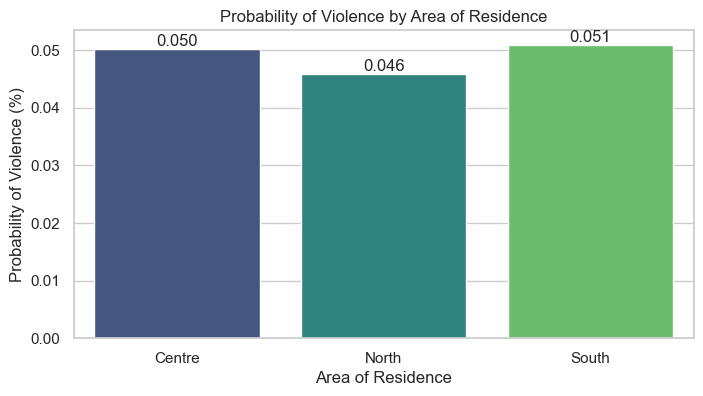

In [908]:

# Set the style to "whitegrid" for the seaborn plot
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(8, 4))

# Creating a bar plot using seaborn
ax = sns.barplot(x='AreaOfResidence', y='%_Violence_Territory', hue='AreaOfResidence', data=violence_by_region_probability, palette="viridis")

# Adding a label at the top of each bar plot 
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')
    
# Adding labels and title to the plot
plt.xlabel('Area of Residence')  # X-axis label
plt.ylabel('Probability of Violence (%)')  # Y-axis label
plt.title('Probability of Violence by Area of Residence')  # Title of the plot

# Displaying the plot
plt.show()

As we can see, the area with the highest probability of experiencing violence is the South, followed by the Centre, and finally, the North. As explained before, this could be the result of multifaceted variables such as economic and cultural factors and being drive to the fact the North and Cente are the richest area in Italy. 

#### **3.2 Generating a DataFrame with 500 Entries for the Variable "AreaOfResidence"**

We will create the **violence_against_women** DataFrame, comprising 500 observations of women characterized by a combination of four variables: Area of Residence, Level of Education, Occupational Status, and Marital Status. Finally it will indicate whether a woman with that specified set of characteristics will experience physical and sexual violence from a partner or ex-partner in her lifetime.

As a first step, we can generate 500 observations that display the variable 'AreaOfResidence.' The entries will be divided among three areas:

- North
- South
- Centre

To generate the entries, we can use a **Random Choice function from NumPy** [[22]](https://www.geeksforgeeks.org/random-choices-method-in-python/). The random choice function allows us to randomly assign each observation to one of the specified areas based on predetermined probabilities or weights. It is the best choice for categorical variables with more than two possible outputs.

To ensure the realism of our dataset, we will utilize the distribution of the Italian population from the 2020 census as predetermined probabilities or weights [[23]](https://www.istat.it/it/files/2021/12/CENSIMENTO-E-DINAMICA-DEMOGRAFICA-2020.pdf). 

In [909]:

# Define the probabilities for each area of residence
prob_population = {'North':0.464, 'South':0.198, 'Centre':0.338}
# List of areas
area_list = ['North', 'South', 'Centre']
# Use the Random Choice function to generate 'AreaOfResidence' entries in the DataFrame
data = np.random.choice(area_list, p=list(prob_population.values()), size=500)
# Create the 'violence_against_women' DataFrame with the generated 'AreaOfResidence' entries
violence_against_women = pd.DataFrame(data, columns=['AreaOfResidence'])

# Display the first few rows of the DataFrame
violence_against_women.head()


,AreaOfResidence
0,North
1,North
2,North
3,Centre
4,North


### **4. Education Level**

The correlation between a woman's educational background and the prevalence of violence is an aspect worth exploring. Higher educational attainment emerges as a potential safeguard, equipping women with knowledge and resources that empower them to navigate and reduce the risk of violence. Moreover, it provides easier access to economic independence, resulting in more flebity to escape from violent situations [[]](https://www.ingenere.it/articoli/fare-i-conti-con-la-violenza).

For the popuse of this analysis we will devide the women in the different level of education:

1. **Primary Education**: Individuals who have completed only primary school education (typically up to 13 years of age).
2. **Secondary education**: Individuals who have successfully completed high school (typically up to 19 years of age).
3. **Higher education**: This category encompasses all forms of higher education, including degrees, bachelor's degrees, master's degrees, PhDs, and more.

As part of our analysis, we will:
1. Calculate the probability that a woman endures physical/sexual violence from a partner and an ex-partner based on the level of education.
2. Add to the **violence_against_women* dataset the distribution for the education level.

#### **4.1 Examining the Probability of Violence Against Women Across Different Education Levels**

With the purpose of the analysis, we will use the dataset **violence_per_educational_level**, sourced from the ISTAT website. This dataset provides insights into the percentage of women who have experienced physical/sexual violence from a partner/ex-partner, categorized by education level. 

    - Import the dataset 

The dataset have been saved in the folder **DataSet**.

In [910]:
# Loading the CSV file into a DataFrame
violence_per_educational_level = pd.read_csv('DataSet/violence_per_educational_level.csv')

    - Check for missing value 

We can now check for missing values. Similar to previous instances, only two columns contain missing values. Since these columns are not relevant for the analysis, they will be dropped accordingly.

In [911]:
# Printing a header to indicate the section related to missing values for violence per region
print(f'== Missing values for "violence_per_educational_level" ==')
# Using the isnull() function to check for missing values and summing them up
missing_values_count = violence_per_educational_level.isnull().sum()
# Printing the count of missing values for each column in the dataset
print(missing_values_count)

== Missing values for "violence_per_educational_level" ==
ITTER107                0
Territory               0
TIPO_DATO_VIOLENZA      0
Data type               0
TIPOAUT                 0
Perpetrator             0
TIPOVIOLENZA            0
Type of violence        0
TITOLO_STUDIO           0
Educational level       0
TIME                    0
Select time             0
Value                   0
Flag Codes            300
Flags                 300
dtype: int64


    - Data exploration, manipulation and cleaning 

*Removing useless or redundant columns and rename some of them for clarity*

After observing the dataset, we can now proceed to drop columns containing irrelevant or duplicate information for our analysis. Additionally, we will rename some columns to enhance clarity.

We will use the same structure used before. We will remove also the column 'Year' and 'Territory' as it has been confirmed it contain only one year observation. 

In [912]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['ITTER107', 'Territory', 'TIPO_DATO_VIOLENZA', 'TIME', 'TIPOAUT', 'TIPOVIOLENZA', 'TITOLO_STUDIO', 'Select time', 'Flag Codes', 'Flags']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
violence_per_educational_level = violence_per_educational_level.drop(columns=columns_to_be_removed)

# Define columns to rename 
columns_to_rename = {
    'Value': '%_Violence_Education',  # Rename 'Value' column to '%_Violence_Education'
    'Educational level': 'Education level',  # Rename 'Educational level' column to 'Education level'
    'Territory': 'AreaOfResidence'  # Rename 'Territory' column to 'AreaOfResidence'
}

# Use the rename method to apply the column name changes
violence_per_educational_level = violence_per_educational_level.rename(columns=columns_to_rename)

*Change the format of the %_Violence_Education column*

We can now divide the **%_Violence_Education** value by 100 to have the percentage expressed as a number between 0 and 1. 

In [913]:
violence_per_educational_level['%_Violence_Education'] = violence_per_educational_level['%_Violence_Education']/100


*Remove the duplicate or not relevant rows of the dataset*

As before some columns containt duplicate value that need to be removed. 

Here the data that we will need to keep and replace for each columns:

| Column Name        | ValueTokeep   | ReplaceWith |Reason  |
|--------------------|--------------|-------------|-------------------------------------------------------------|
| Type of Violence   | physical or sexual | Physical/Sexual |Keep onlly relevant value for the current study |
| Perpetrator        | current partner or former partner | Partner/ExPartner |Keep onlly relevant value for the current study |
| Data type          | Women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)| Victims 16-70 - 5 years |Keep onlly relevant value for the current study|
| Education level   | Keep everything is not 'Total'| ---| Eliminate duplicate values and focus on specific education level|

As the dataset presents the same format and type of data as the previous one, we can reuse the **filter_and_replace** function defined earlier for filter the value needed and rename the rest in a more freindly way. Additionally, we will retain all entries in the 'Education level' column except for 'Total'.

In [914]:
# Filtering the DataFrame to select specific rows based on conditions

# call the function to filter and replace column 'Perpetrator' and 'DataType' previously defined
violence_per_educational_level = filter_and_replace(violence_per_educational_level)
# remove line total from educational level
violence_per_educational_level = violence_per_educational_level.loc[violence_per_educational_level['Education level'] != 'total']

C:\Users\anton\AppData\Local\Temp\ipykernel_16948\2938192141.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [915]:
violence_per_educational_level

,Data type,Perpetrator,Type of violence,Education level,%_Violence_Education
172,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,diploma of upper secondary education and Certi...,0.052
173,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,"no educational degree, final assessment (Prima...",0.026
174,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,diploma of lower secondary education,0.050
175,Victims 16-70 - 5 years,Partner/Ex Partner,Physical/Sexual,"university diploma, bachelor’s degree, master’...",0.061


In [916]:
violence_per_educational_level['Education level'].value_counts()

Education level
diploma of upper secondary education and Certification of higher technical specialisation     1
no educational degree, final assessment (Primary school)                                      1
diploma of lower secondary education                                                          1
university diploma, bachelor’s degree, master’s degree, academy Conservatory old programme    1
Name: count, dtype: int64

*Mapping the education level in the three main categories*

The dataset contains various observations for the 'Education level' column, reflecting the diversity of educational levels that can be reach in Italy. However, for the purpose of this study, we aim to classify them into three main categories:

1. Primary education
2. Secondary education
3. Higher education

Here are the main categories assigned to each unique value in the 'Education level' column:

| Main Category          | Education Level                                                |
|------------------------|----------------------------------------------------------------|
| Secondary Education    | diploma of upper secondary education and Certification of higher technical specialisation |
| Primary Education      | no educational degree, final assessment (Primary school)        |
| Primary Education     | diploma of lower secondary education                           |
| Higher Education       | university diploma, bachelor’s degree, master’s degree, academy Conservatory old programme |

The substituction will be performad using .str.contains() [[]](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html), [[]](https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas).

In [917]:
# Assign 'Primary Education' to values containing 'Primary school' or 'diploma of lower' in the 'Education level' column
violence_per_educational_level.loc[violence_per_educational_level['Education level'].str.contains('Primary school'), 'Education level'] = 'Primary Education'
violence_per_educational_level.loc[violence_per_educational_level['Education level'].str.contains('diploma of lower'), 'Education level'] = 'Primary Education'

# Substitute values containing the word "laurea" in the 'Education level' column with 'Higher Education'
violence_per_educational_level.loc[violence_per_educational_level['Education level'].str.contains('university'), 'Education level'] = 'Higher Education'

# Substitute values containing the word "diploma" in the 'Education level' column with 'Secondary Education'
violence_per_educational_level.loc[violence_per_educational_level['Education level'].str.contains('diploma of upper'), 'Education level'] = 'Secondary Education'


    - Determining the Final Probability Table

Finally We can extract the final table showing the probability that a women endure fisical and sexual violence by the partner/ex parter in 5 years time. 

In [918]:
# Group the DataFrame by 'Education level'
violence_educational_level_probability = violence_per_educational_level.groupby('Education level')['%_Violence_Education'].mean().reset_index()

# Display the resulting DataFrame showing the mean probability of violence for each education level
violence_educational_level_probability

,Education level,%_Violence_Education
0,Higher Education,0.061
1,Primary Education,0.038
2,Secondary Education,0.052


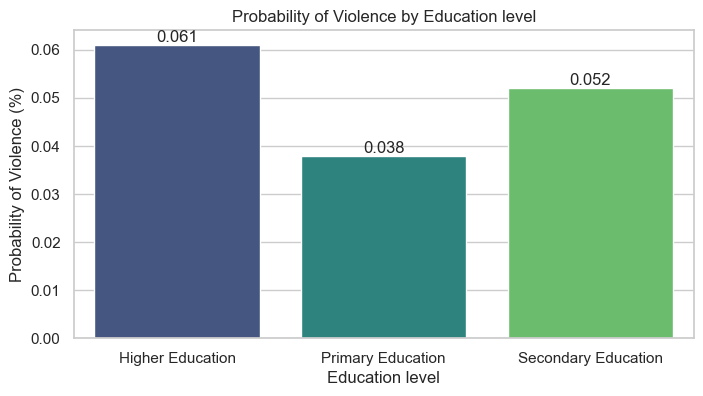

In [919]:
# Set the style to "whitegrid" for the seaborn plot
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(8, 4))

# Creating a bar plot using seaborn
ax = sns.barplot(x='Education level', y='%_Violence_Education', hue='Education level', data=violence_educational_level_probability, palette="viridis")

# Adding a label at the top of each bar plot 
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')
    
# Adding labels and title to the plot
plt.xlabel('Education level')  # X-axis label
plt.ylabel('Probability of Violence (%)')  # Y-axis label
plt.title('Probability of Violence by Education level')  # Title of the plot

# Displaying the plot
plt.show()

As evident from the data, women with higher levels of education seem to have a higher probability of experiencing violence over the past five years. This observation, in my opinion, can be attributed to the age distribution within educational levels. Typically, women attain secondary education around the age of 19 and higher education around the age of 23.

Younger women and older women, who are more likely to have only a primary level of education in the long term, fall into the primary education category. Due to their demographic age, these groups of women have a lower probability of experiencing violence from their partner/ex-partner. This explains why women with primary education are less impacted by violence experiences in the last five years.

Similarly, women with secondary education are often not from the younger generation, and due to their age, they may be less exposed to such phenomena. The observed trends in violence probability across education levels can be contextualized by considering the demographic age distribution within each educational category. 

#####  **4.2 Calculate the education level divided per region of women with age 15+ years and add the distribution to the violence against women dataset**

The aim of this section is to calculate the probability that a woman falls into a particular level of education for each region of residence. It is known that in Italy, the education level in the North is higher than in the South. ISTAT [[]](https://www.istat.it/it/files/2022/10/Livelli-di-istruzione-e-ritorni-occupazionali-anno-2021.pdf) reveals a significant gap in education levels between the North/Central and the South, primarily due to economic differences.

Considering this regional variation, the distribution of educational levels in the 'violence_against_women' dataset needs to be based on the 'Area of Residence' column.

Once the probabilities for each level of education and by region are determined, these probabilities will be combined with a random choice distribution to populate the 'Education Level' column in the 'violence_against_women' dataset.

**4.2.1. Determine the probability of each level of education by Area of Residence** 

The purpose of this part is to determine the percentage of women aged 15 and above with various levels of education devided per area of residence: the North, Central, and Southern regions. This percentage will be then used to create the relevant distribution in the **violence_against_woman** dataset.

The data used for this estimation, saved in the data folder as **Instruction_level_italy**, has been downloaded from the ISTAT website [[]](https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0820EDU,1.0/DCCV_POPTIT1_UNT2020/IT1,52_1194_DF_DCCV_POPTIT1_UNT2020_2,1.0). 
The selected dataset, titled contains information on different levels of education for residents in Italy age 15 to 70, reported in thousands.

    - Import the dataset

In [920]:
# read the dataset 
education_level_italy = pd.read_csv('DataSet/Instruction_level_italy.csv')

    - Check for the missing value 

We can now check the missing value. Same as before, only 2 columns shows missing value but those 2 columns are not relevant with the analysis and they will be dropped. 

In [921]:
# Printing a header to indicate the section related to missing values for violence per region
print(f'== Missing values for "violence_educational_level_probability" ==')
# Using the isnull() function to check for missing values and summing them up
missing_values_count = education_level_italy.isnull().sum()
# Printing the count of missing values for each column in the dataset
print(missing_values_count)

== Missing values for "violence_educational_level_probability" ==
ITTER107                0
Territorio              0
TIPO_DATO_FOL           0
Tipo dato               0
SEXISTAT1               0
Sesso                   0
ETA1                    0
Classe di età           0
TITOLO_STUDIO           0
Titolo di studio        0
TIME                    0
Seleziona periodo       0
Value                   0
Flag Codes           8604
Flags                8604
dtype: int64


    - Data exploration, manipulation and cleaning 

*Removing useless or redundant columns and rename some of them for clarity*

Upon examining the dataset, I have identified several columns that can be removed because they are not relevant for the analysis or because they contain redundant information.

These columns include: ['ITTER107', 'TIPO_DATO_FOL', 'SEXISTAT1', 'Tipo dato', 'ETA1', 'TITOLO_STUDIO', 'TIME', 'Flag Codes', 'Flags'].

In [922]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['ITTER107', 'TIPO_DATO_FOL', 'SEXISTAT1', 'Tipo dato', 'ETA1', 'TITOLO_STUDIO', 'TIME', 'Flag Codes', 'Flags']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
education_level_italy = education_level_italy.drop(columns=columns_to_be_removed)

We can now replace the colum name with a more understandacle meaning for english speaker using The rename() function [[A]](https://www.kdnuggets.com/2022/11/4-ways-rename-pandas-columns.html).

In [923]:
# Renaming columns in a Pandas DataFrame
education_level_italy.rename(
    columns={"Territorio": "AreaOfResidence", 
             "Sesso": "Sex", 
             "Titolo di studio": "Education level",
             "Seleziona periodo": "Year of observation",
             "Classe di età": "Age"
             },
    inplace=True
)

*Remove Duplicate or Irrelevant Rows and Rename Values for Clarity*

The dataset contains numerous redundant or irrelevant values that require removal. Additionally, certain values need to be renamed for improved clarity.

Here are the values to be retained for each column [[]](https://datatofish.com/replace-values-pandas-dataframe/):

| Column                | Value To Keep                 | Replace With                | Reason   |
|-----------------------|-------------------------------|-----------------------------|---------------|
| 'Sex'                 | 'Femmine'                     | 'Female'                    | Only women are relevant for the study                                    |
| 'Year of observation' | '2020'                        | ---                         | Keep the last full year observation                                      |
| 'AreaOfObservation'   | 'Mezzogiorno', 'Centro', 'Nord'| 'South', 'Centre', 'North'  | Retain relevant observations; others are redundant due to overlap        |
| 'Education Level'     | All except 'Totale' | --- | Remove 'Total' values as they are redundant due to overlap |
| Classe di età | 15-64 anni | 15-64 | Retain relevant observations; others are redundant due to overlap        |


In [924]:
# keep only the rows with value "femmmine" in the sex colum
education_level_italy = education_level_italy.loc[education_level_italy['Sex'] == 'femmine']
# replace "femmine" with "female"
education_level_italy['Sex']=education_level_italy['Sex'].replace("femmine", "Female")
# keep only the rows with value "15 anni e più" in the Age column
education_level_italy = education_level_italy.loc[education_level_italy['Age'] == '15-64 anni']
# replace "15 anni e più" with "15+"
education_level_italy['Sex']=education_level_italy['Sex'].replace('15-64 anni', "15-64")

In [925]:
# keep only the rows with value "2020" in the 'Year of observation' column
education_level_italy = education_level_italy.loc[education_level_italy['Year of observation'] == '2020']

# Remove rows with 'totale' value in the 'Education level' columns 
education_level_italy = education_level_italy.loc[education_level_italy['Education level'] != 'totale']

In [926]:
# List of values to be selected from the 'Region' column
filter_list = ['Nord-est', 'Nord-ovest', 'Italia']

# Filter the DataFrame 'Instruction_level_italy' to exclude rows where 'Territorio' is in the 'filter_list'
education_level_italy = education_level_italy.loc[~education_level_italy['AreaOfResidence'].isin(filter_list)]

# replace mezzogiorno, centro and nord
value_to_be_replaced = {"Mezzogiorno": "South",
                        "Centro": "Centre",
                        "Nord":"North"
                        }
education_level_italy['AreaOfResidence'] = education_level_italy['AreaOfResidence'].replace(value_to_be_replaced)

*Mapping the education level in the three main categories*

We will know to map each value in the 'Education Level' column into the three main categories: **Primary Education**, **Secondary Education** and **Higher Education**.

Here the mapping for each unique value in the column:

| MainCategory                | EducationLevel |          
|-------------------------|---------------|
| Primary Education    | licenza di scuola elementare, nessun titolo di studio | 
| Primary Education  | licenza di scuola media        | 
| Secondary Education   | diploma 2-3 anni (qualifica professionale)|
| Secondary Education   | diploma 4-5 anni (maturità)|
|Higher Education|laurea e post-laurea|

The replace will be done with the pandas metho str.contain.


In [927]:

# substitute the value that contain the word "scuola" in the education level column with 'Primary education'A
education_level_italy.loc[education_level_italy['Education level'].str.contains('scuola'), 'Education level'] = 'Primary Education'

# substitute the value that contain the word "diploma" in the education level column with 'high school'
education_level_italy.loc[education_level_italy['Education level'].str.contains('diploma'), 'Education level'] = 'Secondary Education'

# substitute the value that contain the word "laurea" in the education level column with 'higher education'
education_level_italy.loc[education_level_italy['Education level'].str.contains('laurea'), 'Education level'] = 'Higher Education'

     - Determing the final probability of each levle of education divided by Area of residence

We can first calculate the probability of each level of education divided by region. We use the *groupby* operation to group the data by the 'Region' column and calculate the sum of the values for each group. Afterward, we utilize the *map* [[]](https://www.geeksforgeeks.org/python-map-function/) [[]](ttps://sparkbyexamples.com/pandas/pandas-map-function-explained/) [[]](https://practicaldatascience.co.uk/data-science/how-to-use-the-pandas-map-function) function to create a new column, '%_Education_level', based on the total value of the corresponding region.

In [928]:
# Group the dataframe education_level_italy to remove not needed column, groups the row and sum the values
education_level_italy = education_level_italy.groupby(['AreaOfResidence', 'Education level'])['Value'].sum().reset_index()

In [929]:
# Grouping the DataFrame by 'AreaOfResidence' and summing up the 'Value' column for each region
region_groups = education_level_italy.groupby('AreaOfResidence')['Value'].sum()

# Creating a new column '%_Education_level' by dividing the 'Value' column by the sum of values for its corresponding region
education_level_italy['%_Education_level'] = education_level_italy['Value'] / education_level_italy['AreaOfResidence'].map(region_groups)

Finally, we will need to determine the final probability table dropping the value columns and display it. 

In [930]:
#Drop the Value column
education_level_italy.drop(columns=['Value'], inplace=True)

In [931]:
#Display the education_level_italy probability
education_level_italy

,AreaOfResidence,Education level,%_Education_level
0,Centre,Higher Education,0.248352
1,Centre,Primary Education,0.315216
2,Centre,Secondary Education,0.436432
3,North,Higher Education,0.218951
4,North,Primary Education,0.335915
5,North,Secondary Education,0.445134
6,South,Higher Education,0.165541
7,South,Primary Education,0.449849
8,South,Secondary Education,0.384610


In [932]:
# Display the 'education_level_italy' table 
education_level_italy

,AreaOfResidence,Education level,%_Education_level
0,Centre,Higher Education,0.248352
1,Centre,Primary Education,0.315216
2,Centre,Secondary Education,0.436432
3,North,Higher Education,0.218951
4,North,Primary Education,0.335915
5,North,Secondary Education,0.445134
6,South,Higher Education,0.165541
7,South,Primary Education,0.449849
8,South,Secondary Education,0.384610


Consistent with expectations, it appears that the North and the Centre regions exhibit higher rates of women with higher and secondary education compared to the South, which shows an higher rate of women with only primary education. This pattern can be visualized with a plot.

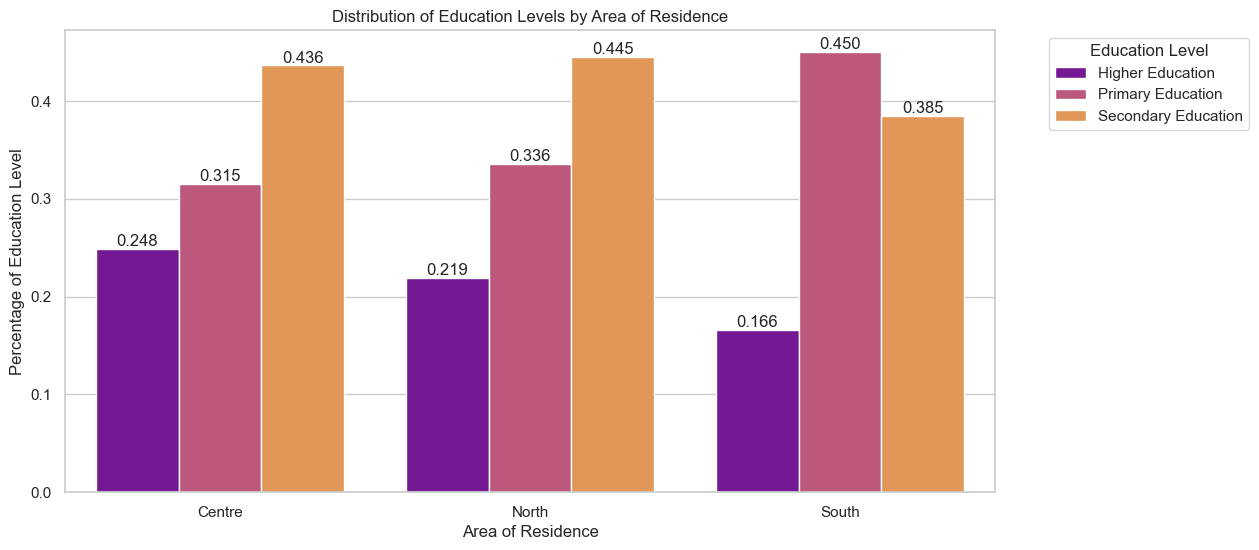

In [933]:
# Set the style to "whitegrid" for the seaborn plot
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Creating a bar plot using seaborn
ax = sns.barplot(x='AreaOfResidence', y='%_Education_level', hue='Education level', data=education_level_italy, palette="plasma")

# Adding a label at the top of each bar plot 
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

# Adding labels and title to the plot
plt.xlabel('Area of Residence')  # X-axis label
plt.ylabel('Percentage of Education Level')  # Y-axis label
plt.title('Distribution of Education Levels by Area of Residence')  # Title of the plot

# Displaying the legend
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.show()

**4.2.2. Create the columns "Education level" on the "violence_against_women" dataset** 

Finally for this section we will need now use the probability for each level of education by Area of residence to calculate the distribution tht will populate the "Educational level" column. Below an explanation of the code used.

<details>
           <summary>Code comments</summary>
           <p>

**Grouping by Region**:This line groups the education_level_italy DataFrame by the 'AreaOfResidence' column and selects the '%_Education_level' column. The result is a grouped object.

```python
grouped_education = education_level_italy.groupby('AreaOfResidence')['%_Education_level']
```
**List of Education Levels**:This line creates a list containing the possible education levels.
```python
education_List = ['Secondary Education', 'Primary Education', 'Higher Education']
```
**Sampling Education Levels Function**: This function takes a row from the violence_against_women DataFrame, extracts the 'AreaOfResidence', gets the corresponding probabilities for education levels from the grouped object, and then uses numpy's random.choice to sample an education level based on these probabilities.
```python
def Education_level(row):
    region = row['AreaOfResidence']
    probabilities = grouped_education.get_group(region).values
    education = np.random.choice(education_List, p=probabilities)
    return education
```
**Applying the Function**: This line applies the Education_level function to each row of the violence_against_women DataFrame along the axis=1 (row-wise) and creates a new column 'Education level' with the sampled education levels.

```python
violence_against_women["Education level"] = violence_against_women.apply(Education_level, axis=1)
```


In [934]:
# Group 'education_level_italy' by 'AreaOfResidence' and select the '%_Education_level' column
grouped_education = education_level_italy.groupby('AreaOfResidence')['%_Education_level']
# List of possible education levels
education_List = ['Secondary Education', 'Primary Education', 'Higher Education']
# Define a function to sample education levels based on probabilities for each region
def Education_level(row):
    # Extract the region for the current row
    region = row['AreaOfResidence']
    # Get the probabilities for education levels in the corresponding region
    probabilities = grouped_education.get_group(region).values
    # Sample an education level based on the probabilities
    education = np.random.choice(education_List, p=probabilities)
    # Return the sampled education level
    return education

# Apply the function to each row in 'violence_against_women' to create the 'Education level' column
violence_against_women["Education level"] = violence_against_women.apply(Education_level, axis=1)

Finally we can display the new version of the **violence_against_women** dataset.

In [935]:
#Display the dataset 
violence_against_women

,AreaOfResidence,Education level
0,North,Higher Education
1,North,Higher Education
2,North,Higher Education
3,Centre,Primary Education
4,North,Secondary Education
...,...,...
495,Centre,Primary Education
496,North,Primary Education
497,Centre,Primary Education
498,South,Secondary Education


### **5. Occupancy level**

The third variable is the Occupancy Level. Specifically, for the purpose of this project, we will categorize a woman's labor status as either 'Occupied' or 'Unoccupied.' The Occupancy status is intricately linked to the Area of Residence [[a]](https://www.istat.it/it/files/2022/10/Livelli-di-istruzione-e-ritorni-occupazionali-anno-2021.pdf) and it holds the potential to be a crucial variable influencing the likelihood that a woman may endure physical or sexual violence from a partner within a 5-year period.

Employment status serves as a socio-economic indicator, shaping power dynamics within relationships and influencing access to resources. Consequently, it may impact the risk of violence. In my opinion, a woman without economic independence, often influenced by her employment status, can easily find herself trapped in unwanted situations.

On this section we will first determinate the probability for a woman to be occupied divided by region.

This probability will be finally be used combined with a random choice distribution to populate the column "Professional Status".

#### **5.1 Probability of violence against women by occupancy level**

For this section, we will utilize the dataset **Violence per Labour Status** stored in the 'dataset' folder of the repository. This dataset was obtained from the ISTAT website [[]](https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0840JUS,1.0/JUS_VIOLENCE/DCCV_VIOL_CARAT/IT1,78_1112_DF_DCCV_VIOL_CARAT_11,1.0) and includes data illustrating the percentage of women who have experienced physical or sexual violence by a partner or ex-partner over a 5-year period, categorized by their employment status.

    - Import the dataset

In [936]:
violence_per_labour_status = pd.read_csv('DataSet/Violence per labour status.csv')


    - Checking missing value 

Again, the dataset doesn't contain any missing relevant value.

In [937]:
# Printing a header to indicate the section related to missing values for violence per region
print(f'== Missing values for "violence_per_labour_status" ==')
# Using the isnull() function to check for missing values and summing them up
missing_values_count = violence_per_labour_status.isnull().sum()
# Printing the count of missing values for each column in the dataset
print(missing_values_count)

== Missing values for "violence_per_labour_status" ==
ITTER107                             0
Territory                            0
TIPO_DATO_VIOLENZA                   0
Data type                            0
TIPOAUT                              0
Perpetrator                          0
TIPOVIOLENZA                         0
Type of violence                     0
CITTADINANZA                         0
Citizenship                          0
CONDIZIONE_DICH4                     0
Labour and professional status       0
TIME                                 0
Select time                          0
Value                                0
Flag Codes                        1744
Flags                             1744
dtype: int64


    - Data exploration, manipulation and cleaning 

*Removing useless or redundant columns and rename some of them for clarity*

After inspecting the dataset, we've identified several columns that contain either irrelevant or redundant data. The following columns will be removed:

['ITTER107', 'TIPO_DATO_VIOLENZA', 'TIPOAUT', 'TIPOVIOLENZA', 'CITTADINANZA', 'Citizenship', 'CONDIZIONE_DICH4', 'TIME', 'Select time', 'Flag Codes', 'Flags'].

A special note about the 'Territory' column: it exclusively contains the value 'Italy,' making it irrelevant for our study. Similarly, the 'TIME' column includes only one year of observation, rendering it unnecessary to retain.

After have drop the no need column we will rename some of the left for better clarity.

In [938]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['ITTER107', 'Territory', 'TIPO_DATO_VIOLENZA', 'TIPOAUT',
       'TIPOVIOLENZA', 'CITTADINANZA', 'Citizenship', 'CONDIZIONE_DICH4',
       'TIME', 'Select time', 'Flag Codes', 'Flags']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
violence_per_labour_status = violence_per_labour_status.drop(columns=columns_to_be_removed)

# Renaming columns in a Pandas DataFrame
violence_per_labour_status.rename(
    columns={'Labour and professional status': 'Professional Status',
             'Value':'%_violence_labour'
        },  inplace=True)



We can divide the '%_violence_labour' by 100 to have the % value show as a number between 0 and 1

In [939]:
#convert percentage values to a range between 0 and 1
violence_per_labour_status['%_violence_labour'] = violence_per_labour_status['%_violence_labour'] / 100


*Remove Duplicate or Irrelevant Rows and Rename Values for Clarity*

After observation here the value that need to be kept/removed and replaced for each columns:
| Column Name        | ValueTokeep   | ReplaceWith |Reason  |
|--------------------|--------------|-------------|-------------------------------------------------------------|
| Type of Violence   | physical or sexual | Physical/Sexual |Keep onlly relevant value for the current study |
| Perpetrator        | current partner or former partner | Partner/ExPartner |Keep onlly relevant value for the current study |
| Data type          | Women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)| Victims 16-70 - 5 years |Keep onlly relevant value for the current study|
| Professional Status  | Keep everything is not 'all items'| ---| Eliminate duplicate values and focus on specific labour status|

In order to perform the drop and replace we will use the function **filter_and_replace** previously define. Then, all the rows containing 'all items' in the 'Professional Status' will be dropped.

In [940]:
# Filtering the DataFrame to select specific rows based on conditions

# call the function to filter and replace column 'Perpetrator' and 'DataType' previously defined
violence_per_labour_status = filter_and_replace(violence_per_labour_status)

# remove line all items from educational level
violence_per_labour_status = violence_per_labour_status.loc[violence_per_labour_status['Professional Status'] != 'all items']



C:\Users\anton\AppData\Local\Temp\ipykernel_16948\2938192141.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



*Mapping each labour status on the 2 main categories: Occupied and unoccupied*

For this study, we will need to map each labour status entered in the 'Professional Status' column into two main categories: Occupied and Unoccupied, where Occupied refers to women with income from a job or retirement, and Unoccupied refers to those who are not employed.

We can extract the unique value from the columns 'Professional status' with the unique() funciont.

In [941]:
# extract unique value 
violence_per_labour_status['Professional Status'].unique()

array(['retired', 'seeking for job', 'executive, employer, professional',
       'middle management, white collar', 'blu collar, apprentice',
       'self-employed, family worker, co.co.co.', 'housewife', 'student',
       'other condition (different from housewife,student,seeking for job,retired)'],
      dtype=object)

Now we need to map each value on the main categories:

| MainCategory  | Professional status                  |
| -------------- | ------------------------------ |
| Occupied       | retired                        |
| Unoccupied     | seeking for job                |
| Occupied       | executive, employer, professional|
| Occupied       | middle management, white collar|
| Occupied       | blu collar, apprentice         |
| Unoccupied     | housewife|
| Unoccupied     | student|
| Occupied       | other condition (different from housewife,student,seeking for job,retired)|


In [942]:
# Replace labour values with 'Occupied' and 'Unoccupied'
replacements_labour_status = {
    'seeking for job': 'Unoccupied',  
    'executive, employer, professional': 'Occupied',  
    'blu collar, apprentice': 'Occupied',  
    'self-employed, family worker, co.co.co.': 'Occupied',  
    'housewife': 'Unoccupied',  
    'student': 'Unoccupied',  
    'other condition (different from housewife,student,seeking for job,retired)': 'Unoccupied',  
    'retired': 'Occupied',  
    'middle management, white collar': 'Occupied'  
}

# Replace values in the 'Professional Status' column using the defined replacements
violence_per_labour_status['Professional Status'] = violence_per_labour_status['Professional Status'].replace(replacements_labour_status)


     - Determing the final violence probability table for professional status

Finally we can extract the final table showing the probability of a woman to go through physical/sexual violence from a partner/ex partner in 5 year time. 

We will use the group by function to removes useless column and group rows. 

In [943]:
# Grouping the violence_per_labour_status DataFrame by 'Professional Status'
violence_per_labour_statu_probability = violence_per_labour_status.groupby('Professional Status')['%_violence_labour'].mean().reset_index()
# Display the final probability of violence based on occupancy status 
violence_per_labour_statu_probability

,Professional Status,%_violence_labour
0,Occupied,0.0434
1,Unoccupied,0.0590


As observed, unoccupied women have a higher probability of experiencing physical and sexual violence from a partner or ex-partner within a 5-year period. This can be attributed to the fact that unoccupied women often lack economic independence, limiting their flexibility and options to prevent and escape such situations.

We can plot the probability to have a better representation.

C:\Users\anton\AppData\Local\Temp\ipykernel_16948\1507873442.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




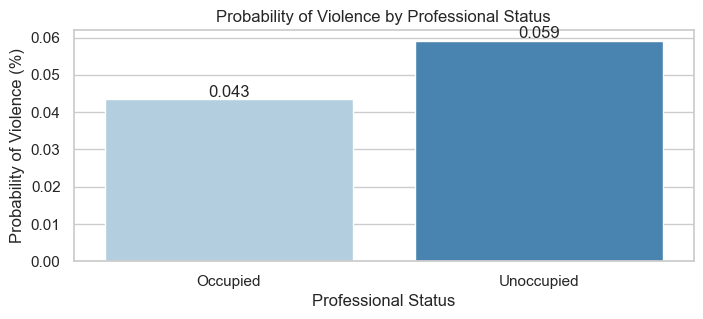

In [944]:
# Set the style to "whitegrid" for the seaborn plot
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(8, 3))

# Creating a bar plot using seaborn
ax = sns.barplot(x='Professional Status', y='%_violence_labour', data=violence_per_labour_statu_probability, palette="Blues")

# Adding a label at the top of each bar plot 
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')
    
# Adding labels and title to the plot
plt.xlabel('Professional Status')  # X-axis label
plt.ylabel('Probability of Violence (%)')  # Y-axis label
plt.title('Probability of Violence by Professional Status')  # Title of the plot

# Displaying the plot
plt.show()

#### **5.2 Generate the distribution for the "Professional status" column in the violence_against_women_dataset**

This column will indicate whether a woman, residing in a particular area and possessing a specific level of education, is occupied or not.

Occupational status is highly dependent on both the area of residence and the level of education [[a]](https://www.istat.it/it/files/2022/10/Livelli-di-istruzione-e-ritorni-occupazionali-anno-2021.pdf). As observed earlier, the North/Central regions are wealthier compared to the South, and women in these regions tend to have higher education levels. The combination of area of residence and level of education may also influence a woman's occupational status, and this status needs to be conditioned based on these factors.

In this section, we will first calculate the probability of a woman being occupied based on her area of residence and level of education. Subsequently, we will generate a new column in the violence_against_women dataset, named "Professional Status." This column will indicate, through a Bernoulli distribution and using the previously calculated probabilities, whether a woman with those specific characteristics is occupied or not."

**5.2.1 Calculate the occupancy rate of women in italy based on Area of residence/level of education**

On this section we will use the dataset **Occupancy data** downloaded from the ISTAT website [[]](https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0500LAB,1.0/LAB_OFFER/LAB_OFF_EMPLOY/DCCV_OCCUPATIT1/IT1,150_938_DF_DCCV_OCCUPATIT1_2,1.0).

The dataset provides values in thousands for the number of occupied people, categorized by level of education and area of residence. From this dataset, we can extract the probabilities of being occupied based on the individual's education level and area of residence.

This probability will be used with a bernouli distribution to populate the **violence_against_women** dataset.

    - Import the dataset

In [945]:
# import the dataset - Occupancy data set 

occupancy_rate = pd.read_csv('DataSet/Occupancy data.csv')

    - Checking missing value 

The dataset doesn't contain any missing value 

In [946]:
# Printing a header to indicate the section related to missing values for violence per region
print(f'== Missing values for "occupancy_rate" ==')
# Using the isnull() function to check for missing values and summing them up
missing_values_count = occupancy_rate.isnull().sum()
# Printing the count of missing values for each column in the dataset
print(missing_values_count)

== Missing values for "occupancy_rate" ==
FREQ                                      0
Frequency                                 0
REF_AREA                                  0
Territory                                 0
DATA_TYPE                                 0
Indicator                                 0
SEX                                       0
Sex (DESC)                                0
AGE                                       0
Age (DESC)                                0
EDU_LEV_HIGHEST                           0
Highest level of education attained       0
Time (TIME_PERIOD)                        0
Observation                               0
OBS_STATUS                             9270
Observation status                     9270
dtype: int64


    - Data exploration, manipulation and cleaning 

*Removing useless or redundant columns and rename some of them for clarity*

As usual, some columns will need to be removed due to uselss or redundant data for the project.

Those are the columns that will need to drop:
['FREQ', 'Frequency', 'REF_AREA', 'DATA_TYPE', 'Indicator', 'SEX', 'AGE', 'EDU_LEV_HIGHEST', 'OBS_STATUS', 'Observation status']

After we will rename some of the left column bor better clarity.

In [947]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['FREQ', 'Frequency', 'REF_AREA', 'DATA_TYPE', 'Indicator',
       'SEX', 'AGE', 'EDU_LEV_HIGHEST', 'OBS_STATUS', 'Observation status']

# Remove the specified columns from the 'Instruction_level_italy' DataFrame
occupancy_rate = occupancy_rate.drop(columns=columns_to_be_removed)

# Renaming columns in a Pandas DataFrame
occupancy_rate.rename(
    columns={"Time (TIME_PERIOD)": "Year",
             "Territory" : "AreaOfResidence",
            "Age (DESC)": 'Age',
            "Highest level of education attained":"Education level",
            'Sex (DESC)': 'Sex',
            'Observation' : '%_occupation'},
    inplace=True
)

We can now change the % format of the column %_occupation to express a number between 0 and 1.

In [948]:
# Change format of percentage column 
occupancy_rate['%_occupation'] = occupancy_rate['%_occupation']/100

*Remove Duplicate or Irrelevant Rows and Rename Values for Clarity*

Here the values from the colums that need to be kept:

| Columns | ValueToKeep | Reason
|---------| ------------|-------|
| AreaOfResidence | Everithing is not 'Nord-est', 'Nord-ovest' and 'Italy' | Duplicate value |
| Year | 2022 | Keep only 2022 observation |
| Sex | Females | Keep the only relevant data for the project |
| Education level | Everything is not 'Total '|Remove duplicate values|



In [949]:
# List of values to be removed from the 'Territity' column
filter_list = ['Nord-est', 'Nord-ovest', 'Italy']

# Filter the DataFrame 'Instruction_level_italy' to exclude rows where 'Territorio' is in the 'filter_list'
occupancy_rate = occupancy_rate.loc[~occupancy_rate['AreaOfResidence'].isin(filter_list)]

# Filter for rows where 'Year' is '2020'
occupancy_rate = occupancy_rate.loc[occupancy_rate['Year']=='2022']

# Filter for rows where 'Sex' is 'Females'
occupancy_rate = occupancy_rate.loc[occupancy_rate['Sex']=='Females']

# Filter for rows where 'Age' is '15-74' years
occupancy_rate = occupancy_rate.loc[occupancy_rate['Age']=='15-74 years']

# Filter for rows where 'Educational Level' is not 'Total'
occupancy_rate = occupancy_rate.loc[occupancy_rate["Education level"]!='Total ']

The Value in the column 'AreaOfResidence' need to be renamed for a betetr clarity on North, South and Centre.

In [950]:
# rename value in the 'AreaOfResidence' column for a better clarity
occupancy_rate["AreaOfResidence"] = occupancy_rate["AreaOfResidence"].replace({
    "Centro (I)": 'Centre',
    'Mezzogiorno': 'South',
    'Nord':'North',
})
occupancy_rate

,AreaOfResidence,Sex,Age,Education level,Year,%_occupation
617,North,Females,15-74 years,'No educational degree primary and lower seco...,2022,0.303864
619,North,Females,15-74 years,Upper and post secondary,2022,0.595232
621,North,Females,15-74 years,'Tertiary (university doctoral and specializa...,2022,0.776481
1769,Centre,Females,15-74 years,'No educational degree primary and lower seco...,2022,0.270148
1771,Centre,Females,15-74 years,Upper and post secondary,2022,0.543475
1773,Centre,Females,15-74 years,'Tertiary (university doctoral and specializa...,2022,0.744607
2153,South,Females,15-74 years,'No educational degree primary and lower seco...,2022,0.140164
2155,South,Females,15-74 years,Upper and post secondary,2022,0.361413
2157,South,Females,15-74 years,'Tertiary (university doctoral and specializa...,2022,0.629646


*Mapping the observation in the Education level column*

We can now map each observation in the "Educational level" column on the three main categories: **Primary**,**Secondary** and **Higher education**.

| MainCategory                | EducationLevel |          
|-------------------------|---------------|
| Primary Education    | No educational degree  primary and lower secondary school certificate | 
| Secondary Education   | Upper and post secondary|
|Higher Education|Tertiary (university  doctoral and specialization courses)|

In [951]:
# rename value in the 'Educational level' column for a better clarity
occupancy_rate["Education level"] = occupancy_rate["Education level"].replace({
    "'No educational degree  primary and lower secondary school certificate'": 'Primary Education',
    'Upper and post secondary ': 'Secondary Education',
    "'Tertiary (university  doctoral and specialization courses)'": 'Higher Education'
})

    - Defining the Final Probability of Violence for Women Based on Area of Residence and Education Level

Finally, we can extract the finalized probability table by utilizing the groupby function to remove unnecessary columns and group the data effectively.
Then, we wisualize them for a better clarity.

In [952]:
#Group the occupancy_rate dataframe and calculating the men of the %_occupation column
occupancy_rate_probability = occupancy_rate.groupby(['AreaOfResidence','Education level'])['%_occupation'].mean().reset_index()

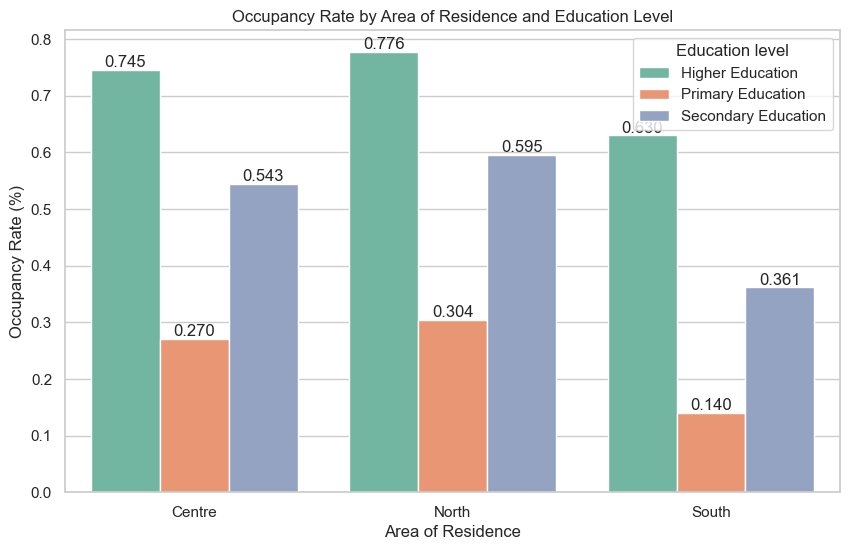

In [953]:
# Set the style to "whitegrid" for the seaborn plot
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Creating a bar plot using seaborn with a different palette
ax = sns.barplot(x='AreaOfResidence', y='%_occupation', hue='Education level', data=occupancy_rate_probability, palette="Set2")

# Adding a label at the top of each bar plot 
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

# Adding labels and title to the plot
plt.xlabel('Area of Residence')  # X-axis label
plt.ylabel('Occupancy Rate (%)')  # Y-axis label
plt.title('Occupancy Rate by Area of Residence and Education Level')  # Title of the plot

# Displaying the plot
plt.show()

From the above, we can observe a significant correlation between occupational probability and both the area of residence and educational level. When considering the area of residence, there is a noticeable overall gap between the North/Centre and the South. The South, for each level of education, exhibits a relevant gap compared to the other two regions. For instance, a woman with a higher level of education in the South of Italy has a 63% chance of being occupied compared to almost 78% in the North.

In all three regions, we also observe a significant impact of the level of education on the occupancy probability. Women with higher education have the highest probability of finding employment, followed by those with secondary education. Finally, individuals with primary education have a significantly lower probability of being occupied compared to those with a higher level of instruction.

**5.2.2 Create the column "Professional Status" in the "violence_against_women" dataset**

We can now use the conjunted probability calculate in the dataframe **occupancy_rate_probability** to generate the column **Professional Status** based on a bernouly distribution where 1 is Occupied and 0 is unoccupied. 

A **Bernoulli** distribution is a discrete probability distribution that describes the outcomes of a random experiment with only two possible outcomes – success and failure. The distribution is characterized by a single parameter, often denoted as pp, which represents the probability of success. The probability of failure (qq), where q=1−pq=1−p, is complementary to the probability of success [[]](https://careerfoundry.com/en/blog/data-analytics/what-is-bernoulli-distribution/).

On Numpy we can implement a bernouly distribution using a random binomial distribution with number of trials equal to 1 [[]](https://www.delftstack.com/howto/numpy/numpy-bernoulli/).

In [954]:
# Group 'occupancy_rate' by 'AreaOfResidence' and 'Education level'
grouped_occupancy_region = occupancy_rate.groupby(['AreaOfResidence', 'Education level'])['%_occupation']

def Occupancy_level(row):
    # Extract 'AreaOfResidence' and 'Education level' from the current row
    row_combination = (row['AreaOfResidence'], row['Education level'])
    
    # Check if the row_combination is present in the grouped data
    if row_combination in grouped_occupancy_region.groups:
        # Retrieve the first value of '%_occupation' for the corresponding group
        rate_of_occupancy = grouped_occupancy_region.get_group(row_combination).values
        # Generate a random binomial variable with probability 'rate_of_occupancy'
        occupation_binomial = np.random.binomial(1, p=rate_of_occupancy)
        # Assign 'Occupied' if the binomial variable is 1, else assign 'Unoccupied'
        occupation = "Occupied" if occupation_binomial == 1 else "Unoccupied"
        return occupation 

# Apply the function to all rows and create a new column 'Professional Status' in 'violence_against_women'
violence_against_women["Professional Status"] = violence_against_women.apply(Occupancy_level, axis=1)

We can now display a simple of the dataframe.

In [955]:
#Display the dataframe
violence_against_women.sample(10)

,AreaOfResidence,Education level,Professional Status
319,South,Higher Education,Occupied
494,Centre,Higher Education,Unoccupied
417,North,Secondary Education,Occupied
338,South,Primary Education,Unoccupied
145,North,Higher Education,Occupied
182,North,Higher Education,Occupied
191,North,Primary Education,Unoccupied
246,North,Primary Education,Unoccupied
263,South,Higher Education,Occupied
266,Centre,Secondary Education,Occupied


### **6. Marital Status**

Research conducted by the ISTAT [[]](https://www4.istat.it/it/violenza-sulle-donne/il-fenomeno/violenza-dentro-e-fuori-la-famig/chi-sono-le-vittime), has underscored a concerning trend — divorced women face a higher probability of enduring violence.

This can suggest a correlation between a woman's marital status and the likelihood of experiencing physical or sexual violence from a partner or ex-partner within a five-year span.

Four distinct categories of marital status will be explored in this context:

- Single
- Married
- Widow
- Divorced

As customary, our approach involves first determining the probability of a woman encountering violence within a five-year timeframe based on her marital status. Subsequently, we will introduce the column Marital Status into the violence_against_women dataset, employing the calculated percentages as probabilities for a random choice distribution. 

#### **6.1. Probability of Violence by marital status**

The aim of this section is to calculate the probability of violence against a woman based on marital status. The data has been extracted from the Marital Status dataset, which is saved in the DataSet folder of the repository. The dataset was downloaded from the ISTAT website [[]](https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0840JUS,1.0/JUS_VIOLENCE/DCCV_VIOL_CARAT/IT1,78_1112_DF_DCCV_VIOL_CARAT_9,1.0) and provides comprehensive data on the percentage of women who experience violence, stratified by marital status.

    - import the dataset


In [956]:
# Import the dataset
violence_marital_status = pd.read_csv('DataSet/Marital Status.csv')

- Checking missing values

Two columns display missing values, but upon observation of the dataset, it was found that these columns are empty and not relevant.

In [957]:
# Printing a header to indicate the section related to missing values for violence per region
print(f'== Missing values for "occupancy_rate" ==')
# Using the isnull() function to check for missing values and summing them up
missing_values_count = violence_marital_status.isnull().sum()
# Printing the count of missing values for each column in the dataset
print(missing_values_count)

== Missing values for "occupancy_rate" ==
FREQ                      0
Frequency                 0
REF_AREA                  0
Territory                 0
DATA_TYPE                 0
Indicator                 0
PERPETRATOR               0
Perpetrator (DESC)        0
TYPE_VIOLENCE             0
Type of violence          0
MARITAL_STATUS_WOMAN      0
Marital status woman      0
Time (TIME_PERIOD)        0
Observation               0
OBS_STATUS              396
Observation status      396
dtype: int64


- Data exploration, manipulation and cleaning 

*Removing useless or redundant columns and rename some of them for clarity*

In [958]:
# List of columns to be removed from the DataFrame
columns_to_be_removed = ['FREQ', 'Frequency', 'REF_AREA', 'Territory', 'DATA_TYPE',
       'PERPETRATOR', 'TYPE_VIOLENCE', 'MARITAL_STATUS_WOMAN', 'OBS_STATUS', 'Observation status']

# Remove the specified columns from the 'violence_marital_status' DataFrame
violence_marital_status = violence_marital_status.drop(columns=columns_to_be_removed)

# Renaming columns in a Pandas DataFrame
violence_marital_status.rename(
    columns={'Time (TIME_PERIOD)': "Year", 
             'Perpetrator (DESC)': 'Perpetrator',
             'Observation' : '%_Marital_Status',
             'Marital status woman':'Marital Status'},
    inplace=True
)

*Remove Duplicate or Irrelevant Rows and Rename Values for Clarity*

Here the values from the colums that need to be kept for the current analysis.

| Column Name        | ValueTokeep   | Reason                                          |
|--------------------|---------------|-------------------------------------------------|
| Type of Violence   | physical or sexual | Keep only relevant value for the current study  |
| Perpetrator        | current partner or former partner | Keep only relevant value for the current study  |
| Data type          | Women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)| Keep only relevant value for the current study|
| Marital Status     | Keep everything is not 'Total'| Eliminate duplicate values and focus on specific Marital status|


In [959]:
# Filter for rows where 'Type of violence' is 'Physical or sexual'
violence_marital_status = violence_marital_status.loc[violence_marital_status['Type of violence'] == 'Physical or sexual']

# Filter for rows where 'Perpetrator' is 'Current partner or former partner'
violence_marital_status = violence_marital_status.loc[violence_marital_status['Perpetrator'] == 'Current partner or former partner']

# Filter for rows where 'Indicator' is 'Women aged 16-70 years who have suffered violence in the past 12 months (% of ever-partnered women 16-70 years)'
violence_marital_status = violence_marital_status.loc[violence_marital_status['Indicator'] == 'Women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)']

# Filter for rows where 'Marital status woman' is not 'Total'
violence_marital_status = violence_marital_status.loc[violence_marital_status['Marital Status'] != 'Total']

Now that the value have been filter we can replace some of them for clarity.

Here the observation that need to be rename across the dataset:

|Column|Value| ReplaceWith |
|------|-----|-------------|
|Indicator|Women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)|Victims 16-70 - 5 years |
|Perpetrator |current partner or former partner | Partner/Ex Partner|
|Marital Status|Single persons (never married and never in same sex civil partnership)|Single|
|Marital Status|Divorced persons|Divorced|
|Marital Status|Married persons|Married|
|Marital Status|Widowed persons|Widowed|


In [960]:
# Replace values in the 'Marital Status' column for better clarity
replacements = {
    'Women aged 16-70 years who have suffered violence in the past 5 years (% of ever-partnered women 16-70 years)': 'Victims 16-70 in the last 5 years',
    'Single persons (never married and never in same sex civil partnership)': 'Single',
    'Married persons': 'Married',
    'Divorced persons': 'Divorced',
    'Widowed persons': 'Widowed',
    'Current partner or former partner': 'Partner/Ex Partner'
}

# Apply the replacement to the 'Marital Status' column in the 'violence_marital_status' DataFrame
violence_marital_status = violence_marital_status.replace(replacements)

We can now change the percentage format in the "%_Marital_Status" as a value from 0 to 1.

In [961]:
# change the format of the percentage with a number between 0 and 1
violence_marital_status['%_Marital_Status'] = violence_marital_status['%_Marital_Status']/100

In [962]:
violence_marital_status

,Indicator,Perpetrator,Type of violence,Marital Status,Year,%_Marital_Status
236,Victims 16-70 in the last 5 years,Partner/Ex Partner,Physical or sexual,Single,2014,0.083
237,Victims 16-70 in the last 5 years,Partner/Ex Partner,Physical or sexual,Married,2014,0.033
238,Victims 16-70 in the last 5 years,Partner/Ex Partner,Physical or sexual,Divorced,2014,0.087
239,Victims 16-70 in the last 5 years,Partner/Ex Partner,Physical or sexual,Widowed,2014,0.001


    - Defining the Final Probability of Violence for Women Based on Area of Residence and Education Level

We can finally Drop the not needed column to have the final tab showing the probability of violence divided per Marital Status and visualize the finnal probability dataframe for Marital Status.

In [963]:
# Define columns to be dropped 
columns_to_be_removed = ['Indicator', 'Perpetrator', 'Type of violence', 'Year']

# Remove the specified columns from the 'violence_marital_status' DataFrame
violence_marital_status_probability = violence_marital_status.drop(columns=columns_to_be_removed).reset_index(drop=True)

In [964]:
#Display the dataframe
violence_marital_status_probability

,Marital Status,%_Marital_Status
0,Single,0.083
1,Married,0.033
2,Divorced,0.087
3,Widowed,0.001


From above the women with an higher risk of violence are single and divorced. On the contrary, widowed are the one less impacted by the violence. We can know plot the probability to have a visaul rapresentation of them.

C:\Users\anton\AppData\Local\Temp\ipykernel_16948\3580755685.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




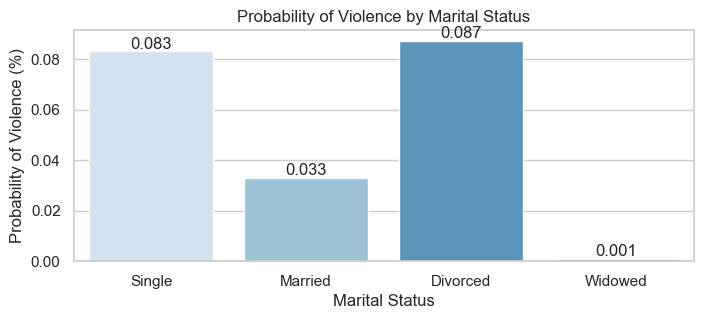

In [965]:
# Set the style to "whitegrid" for the seaborn plot
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(8, 3))

# Creating a bar plot using seaborn
ax = sns.barplot(x='Marital Status', y='%_Marital_Status', data=violence_marital_status_probability, palette="Blues")

# Adding a label at the top of each bar plot 
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')
    
# Adding labels and title to the plot
plt.xlabel('Marital Status')  # X-axis label
plt.ylabel('Probability of Violence (%)')  # Y-axis label
plt.title('Probability of Violence by Marital Status')  # Title of the plot

# Displaying the plot
plt.show()

##### **6.2 Generate the distribution for the "Marital status" column in the violence_against_women_dataset**

The purpose of this section is to generate a "Marital status" column on the "violence_against_women_dataset" that indicates the marital status of the women under observation, taking into account their area of residence.

In this section, we will initially calculate the probability for each area of residence that a woman falls into one of the following categories: single, married, widowed, or divorced. Subsequently, we will generate a new column in the violence_against_women dataset, named "Marital status." This column will indicate, through a random choice distribution and using the previously calculated probabilities, the marital status of each woman.

**6.2.1. Probability divided per region of Marital status**

The distribution between marital status and area of residence in italy have been extracted from the [comuni-italiani website []](http://www.comuni-italiani.it/statistiche/coniugati.html).

The website show the % of married, single, widow and divorced people divided by region.

    - Create the Dataframe

First we will need to enter the data as a dataframe using the **io.StringIO()** metod [[]](https://www.geeksforgeeks.org/construct-a-dataframe-in-pandas-using-string-data/). This code uses the io.StringIO module to convert the data string into a file-like object that pandas can read with pd.read_csv.

In [966]:
import io

data = """
AreaOfResidence Single Married Divorced Widowed Total
Puglia 1680431 2047771 59777 275909 4063888
Basilicata 233063 283826 8108 45368 570365
Molise 125197 154426 4608 26218 310449
Abruzzo 534579 655591 27093 104984 1322247
Sicilia 2122407 2493149 78610 362475 5056641
Calabria 826606 968893 24960 144669 1965128
Campania 2523006 2853658 75166 387254 5839084
Umbria 361138 431497 22299 73974 888908
Marche 636481 741108 36403 124063 1538055
Toscana 1538464 1792460 107568 303945 3742437
Veneto 2080718 2336002 136439 354370 4907529
Piemonte 1771528 2090721 164131 366146 4392526
FriuliVeneziaGiulia 490888 572662 48255 106067 1217872
Lombardia 4318788 4680254 300759 719365 10019166
Lazio 2566807 2744813 177640 408864 5898124
Liguria 624489 726605 67158 147055 1565307
Sardegna 740771 759875 35809 116680 1653135
EmiliaRomagna 1917061 2037025 150809 343946 4448841
Valled'Aosta 56546 54971 5499 9867 126883
TrentinoAltoAdige 506054 457265 32706 66835 1062860

"""

# Read the data into a DataFrame
marital_stausu_distribution = pd.read_csv(io.StringIO(data), delimiter="\s+")

# Display the DataFrame
marital_stausu_distribution

,AreaOfResidence,Single,Married,Divorced,Widowed,Total
0,Puglia,1680431,2047771,59777,275909,4063888
1,Basilicata,233063,283826,8108,45368,570365
2,Molise,125197,154426,4608,26218,310449
3,Abruzzo,534579,655591,27093,104984,1322247
4,Sicilia,2122407,2493149,78610,362475,5056641
5,Calabria,826606,968893,24960,144669,1965128
6,Campania,2523006,2853658,75166,387254,5839084
7,Umbria,361138,431497,22299,73974,888908
8,Marche,636481,741108,36403,124063,1538055
9,Toscana,1538464,1792460,107568,303945,3742437


    - Map 'AreaOfResidence' column's value 
Similar as above due to omogeneity with the violence_against_women dataframe, we will now map each regions in three main area: North, South and Centre.
The following code replace the specified values in the 'AreaOfResidence' column of the marital_stausu_distribution DataFrame according to the regions defined in the replacements_regions dictionary.

In [967]:

# Replace multiple values in the 'AreaOfResidence' column
replacements_regions = {
    'Liguria': 'North', 
    'Lombardia': 'North',
    'Piemonte': 'North',
    "Valled'Aosta": 'North',
    'EmiliaRomagna': 'North',
    'FriuliVeneziaGiulia': 'North',
    'TrentinoAltoAdige': 'North',
    'Veneto': 'North',
    'Lazio': 'Centre',
    'Marche': 'Centre',
    'Toscana': 'Centre',
    'Umbria': 'Centre',
    'Abruzzo': 'South',
    'Basilicata': 'South',
    'Calabria': 'South',
    'Campania': 'South',
    'Molise': 'South',
    'Puglia': 'South',
    'Sardegna': 'South',
    'Sicilia': 'South',
}

# Replace values in the 'Territory' column using the dictionary
marital_stausu_distribution['AreaOfResidence'] = marital_stausu_distribution['AreaOfResidence'].replace(replacements_regions)

# Display the updated DataFrame
marital_stausu_distribution

,AreaOfResidence,Single,Married,Divorced,Widowed,Total
0,South,1680431,2047771,59777,275909,4063888
1,South,233063,283826,8108,45368,570365
2,South,125197,154426,4608,26218,310449
3,South,534579,655591,27093,104984,1322247
4,South,2122407,2493149,78610,362475,5056641
5,South,826606,968893,24960,144669,1965128
6,South,2523006,2853658,75166,387254,5839084
7,Centre,361138,431497,22299,73974,888908
8,Centre,636481,741108,36403,124063,1538055
9,Centre,1538464,1792460,107568,303945,3742437


We can now group the rows based on the Area of residence and sum the relative value.

In [968]:
# Group by 'AreaOfResidence' and sum specified columns, then reset the index
marital_stausu_distribution = marital_stausu_distribution.groupby('AreaOfResidence')[['Single', 'Married', 'Divorced', 'Widowed', 'Total']].sum().reset_index()

     - Generate the final probability for each marital status group by area of residence 

Finally, we will need to determinate the probability of each marital status, conidering the Area of residence, and extract the final probability dataframe.

To do so in the following script we first calculate the percentages for each marital status category relative to the 'Total' column and then creates a new DataFrame without the original count columns.

Finally we will display the **marital_status_distribution_probability** dataframe.

In [969]:
# Calculate the percentage of each marital status category relative to the 'Total' column
marital_stausu_distribution['Single(%)'] = marital_stausu_distribution['Single'] / marital_stausu_distribution['Total']
marital_stausu_distribution['Married(%)'] = marital_stausu_distribution['Married'] / marital_stausu_distribution['Total']
marital_stausu_distribution['Divorced(%)'] = marital_stausu_distribution['Divorced'] / marital_stausu_distribution['Total']
marital_stausu_distribution['Widowed(%)'] = marital_stausu_distribution['Widowed'] / marital_stausu_distribution['Total']

# List of columns to be removed from the DataFrame
columns_to_be_removed = ['Single', 'Married', 'Divorced', 'Widowed', 'Total']

# Remove the specified columns from the 'marital_stausu_distribution' DataFrame
marital_status_distribution_probability = marital_stausu_distribution.drop(columns=columns_to_be_removed)

In [970]:
# Display the updated DataFrame with the calculated percentages
marital_status_distribution_probability

,AreaOfResidence,Single(%),Married(%),Divorced(%),Widowed(%)
0,Centre,0.422861,0.473161,0.028499,0.075479
1,North,0.424140,0.467017,0.032650,0.076192
2,South,0.422794,0.491662,0.015116,0.070428


**6.2.2. Generate the "Marital status" column in the "violence_against_women" dataframe**

We need now to use the percentage of each marital status previously calculate to generate a distribution to populate the "Marital Status" column in our dataset through a random choice distribution. 

To do so, the code starts by computing the average percentages of various marital statuses for each region. It then defines a function, **generate_marital_status**, which extracts the regional probabilities and utilizes NumPy's **random choice** [[]](https://www.geeksforgeeks.org/flatten-a-list-of-dataframes/) mechanism to stochastically assign a **Marital Status** to each row in the **violence_against_women** DataFrame. The function considers the calculated probabilities as weights, allowing for a more realistic representation of marital status distributions across different regions. This process introduces a degree of randomness, reflecting the inherent variability in marital status patterns within each geographic area.

In [971]:
# Calculate the mean of marital status percentages for each region
marital_status_distribution_probability = marital_stausu_distribution.groupby('AreaOfResidence')[['Single(%)', 'Married(%)', 'Divorced(%)', 'Widowed(%)']].mean().reset_index()

# Define the list of marital status categories
marital_status_list = ['Single', 'Married', 'Divorced', 'Widowed']

# Create a function to generate random marital statuses based on probabilities
def generate_marital_status(row):
    # Extract the region from the row
    region = row['AreaOfResidence']

    # Extract the probabilities for each marital status category in the region
    probability = marital_status_distribution_probability.loc[marital_status_distribution_probability['AreaOfResidence'] == region]

    # Flatten the probability values into a 1D array
    prob = probability.loc[:, 'Single(%)':].values.flatten()

    # Generate a random marital status based on the probabilities
    return np.random.choice(marital_status_list, p=prob)

# Apply the function to create the 'Marital Status' column in the 'violence_against_women' DataFrame
violence_against_women['Marital Status'] = violence_against_women.apply(generate_marital_status, axis=1)

# Display the updated 'violence_against_women' DataFrame with the new 'Marital Status' column
violence_against_women

,AreaOfResidence,Education level,Professional Status,Marital Status
0,North,Higher Education,Occupied,Single
1,North,Higher Education,Unoccupied,Single
2,North,Higher Education,Occupied,Married
3,Centre,Primary Education,Unoccupied,Married
4,North,Secondary Education,Unoccupied,Single
...,...,...,...,...
495,Centre,Primary Education,Unoccupied,Single
496,North,Primary Education,Unoccupied,Married
497,Centre,Primary Education,Unoccupied,Married
498,South,Secondary Education,Unoccupied,Married


In [972]:
violence_against_women['Marital Status'].value_counts()

Marital Status
Single      227
Married     218
Widowed      41
Divorced     14
Name: count, dtype: int64

### **7. Finalizing the datase: violence_against_women_dataset**

This section generates and explores the final dataset indicating whether a woman, based on a specific combination of area of residence, level of education, occupational status, and marital status, has experienced violence within the last 5 years.

#### **7.2 Generate the Distribution of the ViolenceOccurred Column**

We can now generate the final column of the dataset that will indicate whether a woman with that set of characteristics will experience violence or not.

For this task, we will use the inclusion-exclusion principle [[]](https://www.gameludere.it/2019/01/18/principio-di-inclusione-esclusione/) [[]](https://it.wikipedia.org/wiki/Principio_di_inclusione-esclusione) to calculate the probability that a woman, with that set of characteristics, will experience violence.

This has been done through a code that generates a synthetic dataset, called **violence_against_women_dataset**, by combining the **violence_against_women** dataset with the probability to endure physical/sexual violence by a partner/expartner in the next 5 year by education level, region of residence, labor status, and marital status. It then calculates the probability of experiencing violence based on these factors, using the inclusion-exclusion principle, simulates whether an individual has experienced violence and provides counts of 'Yes' and 'No' in the **ViolenceOccurred** column.

Below a more detailed explanation of the code.

<details>
  <summary>Data Merging</summary>

These lines of code merge several DataFrames (**violence_educational_level_probability, violence_by_region_probability, violence_per_labour_statu_probability, and violence_marital_status_probability**) into the **violence_against_women** DataFrame based on specific columns such as 'Education level', 'AreaOfResidence', 'Professional Status', and 'Marital Status'. It the create a new dataframe, our final dataframe, called **violence_against_women_dataset**. The merge have been performed with the merge function [[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) [[]](https://realpython.com/pandas-merge-join-and-concat/).

In [973]:
# Merge the probability DataFrames
violence_against_women_dataset = pd.merge(violence_against_women, violence_educational_level_probability, on='Education level')
violence_against_women_dataset = pd.merge(violence_against_women_dataset, violence_by_region_probability, on='AreaOfResidence')
violence_against_women_dataset = pd.merge(violence_against_women_dataset, violence_per_labour_statu_probability, on='Professional Status')
violence_against_women_dataset = pd.merge(violence_against_women_dataset, violence_marital_status_probability, on='Marital Status')


<details>
  <summary>Define the calculate_violence_occurred function</summary>

A function named **calculate_violence_occurred** is defined to determine the occurrence of violence for each individual based on the total probability. This function takes a row of data as input, extracts probabilities from specific columns, and calculates the total probability using the inclusion-exclusion principle. Subsequently, the total probability is used in a Bernoulli distribution, simulated with a binomial distribution with one trial. The output is a binary value, where 1 indicates violence occurrence and 0 signifies no violence. Finally, the binary outcome is transformed through an if statement, with 1 being represented as 'Yes' and 0 as 'No' in the result.

In [974]:
# def the calculate_violence_occurred function to calculate the total probability
def calculate_violence_occurred(row):
    # Extract probabilities from the row
    a = row['%_Violence_Education']
    b = row['%_Violence_Territory']
    c = row['%_violence_labour']
    d = row['%_Marital_Status']

    # Calculate total probability using the inclusion-exclusion principle
    total_probability = (
        a + b + c + d -
        (a * b) - (a * c) - (a * d) -
        (b * c) - (b * d) - (c * d) +
        (a * b * c) + (a * b * d) + (a * c * d) + (b * c * d) -
        (a * b * c * d)
    )

    # Use the total probability to simulate violence occurrence
    violence_occurred = np.random.binomial(1, p=total_probability)
    # Assign 'Yes' if violence occurred, 'No' otherwise
    event = "Yes" if violence_occurred == 1 else "No"

    return event

<details>
  <summary>Applying the function</summary>

The **calculate_violence_occurred** function is applied to each row of the DataFrame using the **apply** method. The result, indicating whether violence occurred ('Yes') or not ('No'), is stored in a new column named **ViolenceOccurred**.

In [975]:
# Apply the function to each row to calculate total probability and output 'Yes' or 'No'
violence_against_women_dataset['ViolenceOccurred'] = violence_against_women_dataset.apply(calculate_violence_occurred, axis=1)

<details>
  <summary>Formatting the dataset and display</summary>

Finally, the dataframe is formatted for a better display dropping the columnns created for the final calculation and not needed anymore and we can display the final dataset.

In [976]:
# Drop all probability columns as they are no longer needed
remove_columns = ['%_Violence_Education', '%_Violence_Territory', '%_violence_labour', '%_Marital_Status']
violence_against_women_dataset.drop(remove_columns , axis=1, inplace=True)

In [977]:
#Display the dataset 
violence_against_women_dataset.columns

print('violence_against_women_dataset.columns')
violence_against_women_dataset.columns

violence_against_women_dataset.columns


Index(['AreaOfResidence', 'Education level', 'Professional Status',
       'Marital Status', 'ViolenceOccurred'],
      dtype='object')

#### **7.2 Data exploration and visualizatio**n

We can now check with a graph the count of the woman who endured violence withing 5 year based on the dataset. For visualization issue I have choose a bar plot and a cake plot. Both of them apply to categorical variable.

The following python code create a side-by-side comparison [[]](https://python-course.eu/numerical-programming/creating-subplots-in-matplotlib.php) of visualizations for the Varaiable **ViolenceOccurred** of the dataset/. The first subplot is a countplot (bar chart) [[]](https://datagy.io/seaborn-countplot/) [[]](https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot) showing the number of women who endured violence within 5 years. The second subplot is a pie chart illustrating the same distribution in another verison [[]](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html). The code employs informative color palettes and formatting for enhanced clarity and aesthetics. Labels are added to the countplot bars for better readability. The figure is titled "Violence Against Women - 5 Year Analysis," and the layout is adjusted to prevent clipping.



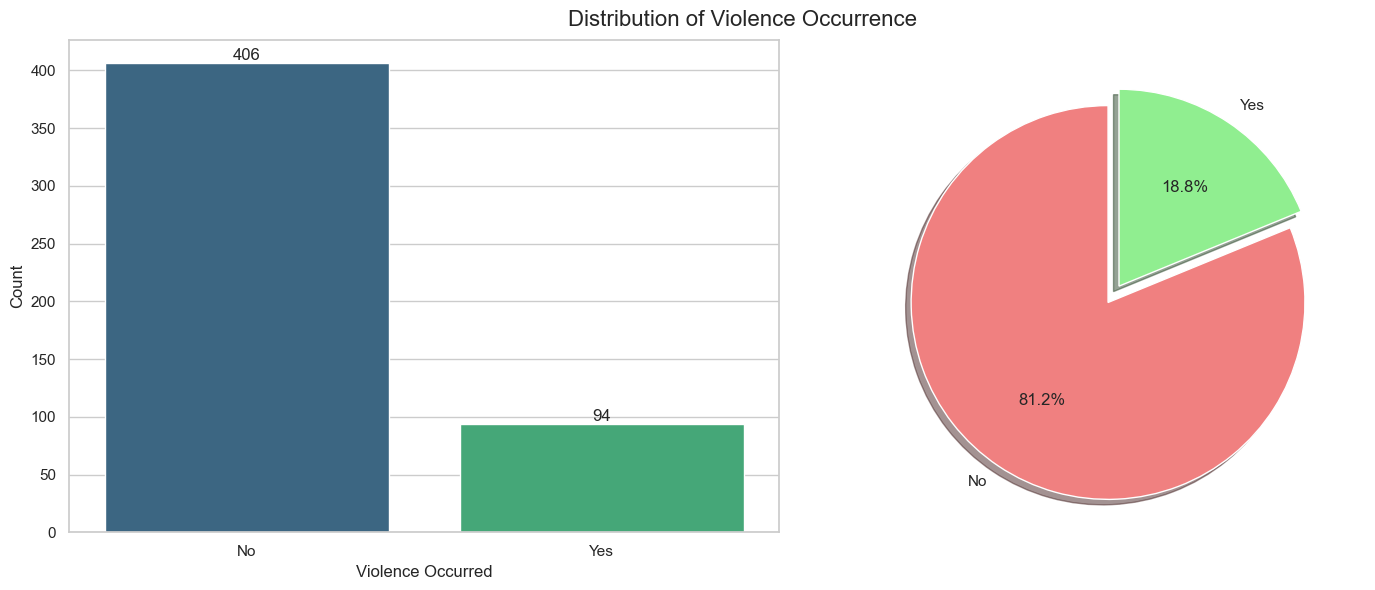

In [978]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot a countplot on the first subplot (ax1)
sns.countplot(x='ViolenceOccurred', data=violence_against_women_dataset, hue='ViolenceOccurred', palette='viridis', ax=ax1)

# Add labels to the bars in the countplot
for label in ax1.containers:
    ax1.bar_label(label)

# Set labels for the first subplot
ax1.set_xlabel('Violence Occurred')
ax1.set_ylabel('Count')

# Calculate and plot a pie chart on the second subplot (ax2)
violence_occurred_counts = violence_against_women_dataset['ViolenceOccurred'].value_counts()
labels = violence_occurred_counts.index
sizes = violence_occurred_counts.values
colors = ['lightcoral', 'lightgreen']
explode = (0.1, 0)

ax2.pie(sizes, labels=labels, explode=explode,
        colors=colors, autopct='%1.1f%%', 
        shadow=True, startangle=90)

# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Add a title to the entire figure
fig.suptitle('Distribution of Violence Occurrence', fontsize=16)

# Display the plot
plt.show()

Another nice plot for visualizing categorical variables is the sunburst plot [[]](#https://plotly.com/python/sunburst-charts/) [[]](https://python-charts.com/part-whole/sunburst-plotly/?utm_content=cmp-true) [[]](https://plotly.com/python/setting-graph-size/). A sunburst plot provides a hierarchical view of data, representing nested categories with concentric circles. Each circle segment corresponds to a category, and the size of each segment reflects its proportion within the overall data. This type of plot is particularly useful for illustrating the relationships and compositions within categorical data, offering an insightful and visually appealing way to explore complex hierarchies. Sunburst plots are valuable for conveying both the distribution and the hierarchical structure of categorical variables in a single, intuitive visualization. The sunburst has been geenrated with the plotly library. 

In [979]:
# Create a sunburst plot for violence against women dataset
fig = px.sunburst(
    violence_against_women_dataset, 
    path=['ViolenceOccurred', 'AreaOfResidence', 'Education level', 'Professional Status', 'Marital Status'],  # Hierarchy of categories
    color='AreaOfResidence',  # Color variable for differentiating segments
    color_discrete_map={'(?)': 'black', 'Lunch': 'gold', 'Dinner': 'darkblue'},  # Custom color mapping for specific values
    width=800, height=400  # Set the width and height of the plot
)

# Update layout for better appearance by adjusting margins
fig.update_layout(margin=dict(l=10, r=10, b=10, t=10))

# Show the sunburst plot
fig.show()

We can now check how many yes value, for the variable ViolenceOccurred, have been geenrated grouped by the other variable. 

The code create a 2x2 subplot [[]](https://github.com/Cecilia8989/pands-project/blob/main/analysis.py)grid containing four count plots, each comparing the occurrence of violence against women based on Marital Status, Area of Residence, Education Level, and Professional Status. Each subplot displays a count plot [[]](https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot), showing the distribution of violence occurrences within each category of the respective variable, and legends are provided only for the first subplot (Marital Status) [[]](https://stackoverflow.com/questions/5735208/remove-the-legend-on-a-matplotlib-figure).

As we can see from the below figure the variable that look impact more the distribution of "Yes" is marital status. This was already brough up previously, when the probability for each category where defined, as single and divorced show an higher rate of violence within 5 years.

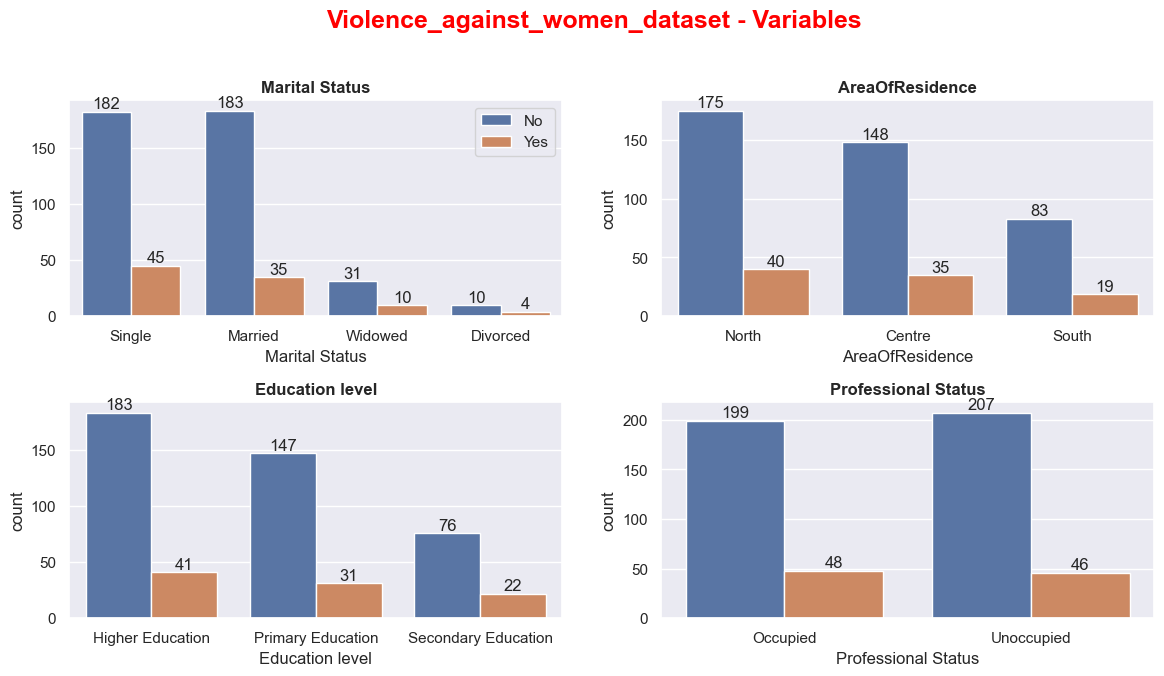

In [980]:

# Create a subplot with 4 count plots comparing different variables
fig = plt.figure(figsize=(14, 7))
sns.set_style("darkgrid")
fig.subplots_adjust(hspace=0.4, top=0.85)
plt.suptitle("Violence_against_women_dataset - Variables", fontsize=18, color='red', fontweight='bold')

# Create the first count plot comparing Marital Status
plt.subplot(221)
plt.title("Marital Status", fontweight='bold')
ax = sns.countplot(data=violence_against_women_dataset, x='Marital Status', hue='ViolenceOccurred')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(loc='upper right')  # Keep the legend for the first subplot

# Create the second count plot comparing AreaOfResidence
plt.subplot(222)
plt.title("AreaOfResidence", fontweight='bold')
ax = sns.countplot(data=violence_against_women_dataset, x='AreaOfResidence', hue='ViolenceOccurred')
for container in ax.containers:
    ax.bar_label(container)
ax.legend().set_visible(False)  # Hide the legend for this subplot

# Create the third count plot comparing Education level
plt.subplot(223)
plt.title("Education level", fontweight='bold')
ax = sns.countplot(data=violence_against_women_dataset, x='Education level', hue='ViolenceOccurred')
for container in ax.containers:
    ax.bar_label(container)
ax.legend().set_visible(False)  # Hide the legend for this subplot

# Create the fourth count plot comparing Professional Status
plt.subplot(224)
plt.title("Professional Status", fontweight='bold')
ax = sns.countplot(data=violence_against_women_dataset, x='Professional Status', hue='ViolenceOccurred')
for container in ax.containers:
    ax.bar_label(container)
ax.legend().set_visible(False)  # Hide the legend for this subplot

#Show the plot.
plt.show()

Another way to visualize it is through a crosstable for each variable. As expected, considering the probability previously calculated, we have an higher % of yes for women from the south, that due to the lower economic level, with lower education level, unoccupied and divorced or Single.

The one that show an higher impact on the probability to endure violence is the Marital Status when a woman is single or divorced.

About this last point it confirm a general research that show that the period more in danger to a woman to endure violence is when she try to leave the partner [[]](https://www4.istat.it/it/violenza-sulle-donne/il-fenomeno/violenza-dentro-e-fuori-la-famig/chi-sono-le-vittime). 

The following code define a function **calculate_and_display_crosstab** that computes and presents crosstabulations with the percentage of 'Yes' for specified categorical variables related to violence against women. The crosstab() methond [[]](https://pbpython.com/pandas-crosstab.html). It then applies this function to each variables displaying the results with sorted percentages of 'Yes' in descending order. 


In [981]:
# Function to calculate and display a crosstab with percentage of 'Yes' for a given variable
def calculate_and_display_crosstab(variable, dataset):
    # Create a crosstab between the specified variable and 'ViolenceOccurred'
    cross_table = pd.crosstab(dataset[variable], dataset['ViolenceOccurred'])
    # Calculate the percentage of 'Yes' for each category
    cross_table['% Yes'] = cross_table['Yes'] / (cross_table['No'] + cross_table['Yes'])
    # Sort the crosstab by the percentage of 'Yes' in descending order
    return cross_table.sort_values(by='% Yes', ascending=False)

# Calculate and display crosstab for 'AreaOfResidence'
cross_area_of_residence = calculate_and_display_crosstab('AreaOfResidence', violence_against_women_dataset)
# Calculate and display crosstab for 'Marital Status'
cross_marital_status = calculate_and_display_crosstab('Marital Status', violence_against_women_dataset)
# Calculate and display crosstab for 'Professional Status'
cross_professional_status = calculate_and_display_crosstab('Professional Status', violence_against_women_dataset)
# Calculate and display crosstab for 'Education Level'
cross_education_level = calculate_and_display_crosstab('Education level', violence_against_women_dataset)

# Display the results
display(cross_area_of_residence, cross_marital_status, cross_professional_status, cross_education_level)

ViolenceOccurred,No,Yes,% Yes
AreaOfResidence,,,
Centre,148,35,0.191257
South,83,19,0.186275
North,175,40,0.186047


ViolenceOccurred,No,Yes,% Yes
Marital Status,,,
Divorced,10,4,0.285714
Widowed,31,10,0.243902
Single,182,45,0.198238
Married,183,35,0.160550


ViolenceOccurred,No,Yes,% Yes
Professional Status,,,
Occupied,199,48,0.194332
Unoccupied,207,46,0.181818


ViolenceOccurred,No,Yes,% Yes
Education level,,,
Secondary Education,76,22,0.224490
Higher Education,183,41,0.183036
Primary Education,147,31,0.174157


If we examine the general cross-tabulation displaying all variable combinations it's important to note that the dataset is designed to emulate a realistic random distribution of women. Consequently, the larger number of women experiencing violence may be found in categories that are more heavily represented in the dataset, such as 'North' and 'Married, even though certain categories, such as 'divorced' and 'single,' appear to have a higher probability of enduring violence. 

The highest absolute value in the dataset, representing women enduring physical or sexual violence by a partner within 5 years, might be associated with a combination of variables that, despite having a lower probability of exposure, holds a higher representation in the dataset.

In [983]:
# Sostituisci 'YourDataset' con il nome effettivo della variabile nel tuo codice
full_crosstab = pd.crosstab(index=[violence_against_women_dataset['AreaOfResidence'], violence_against_women_dataset['Marital Status'], violence_against_women_dataset['Education level'], violence_against_women_dataset['Professional Status']], 
                            columns=violence_against_women_dataset['ViolenceOccurred'],
                            margins=True)
                            
# Visualizza la crosstab completa
full_crosstab.sort_values(by='Yes', ascending=False)

ViolenceOccurred                                                         No  \
AreaOfResidence Marital Status Education level     Professional Status        
All                                                                     406   
North           Single         Higher Education    Occupied              35   
                Married        Higher Education    Occupied              26   
Centre          Married        Higher Education    Occupied              21   
South           Single         Primary Education   Unoccupied            17   
North           Single         Secondary Education Unoccupied             6   
Centre          Single         Higher Education    Occupied              23   
North           Single         Primary Education   Occupied               4   
Centre          Single         Primary Education   Occupied               3   
                                                   Unoccupied            15   
North           Single         Primary Education   Unoccupied            21   
Centre          Widowed        Higher Education    Occupied               4   
North           Married        Higher Education    Unoccupied            10   
Centre          Single         Higher Education    Unoccupied             7   
South           Widowed        Primary Education   Unoccupied             5   
                Single         Higher Education    Occupied               4   
                Married        Primary Education   Unoccupied            21   
North           Divorced       Secondary Education Unoccupied             0   
                Married        Secondary Education Occupied               4   
                                                   Unoccupied             7   
Centre          Married        Primary Education   Unoccupied            13   
                                                   Occupied               8   
                               Secondary Education Unoccupied             3   
                                                   Occupied              11   
North           Widowed        Primary Education   Unoccupied             2   
                Single         Secondary Education Occupied               9   
South           Married        Secondary Education Unoccupied             6   
                               Higher Education    Occupied               5   
                Divorced       Higher Education    Unoccupied             0   
North           Widowed        Secondary Education Unoccupied             1   
South           Single         Higher Education    Unoccupied             5   
                               Primary Education   Occupied               2   
North           Widowed        Higher Education    Unoccupied             0   
Centre          Single         Secondary Education Occupied               8   
South           Single         Secondary Education Occupied               2   
North           Single         Higher Education    Unoccupied            11   
Centre          Widowed        Higher Education    Unoccupied             2   
                Divorced       Primary Education   Unoccupied             2   
South           Single         Secondary Education Unoccupied             5   
North           Married        Primary Education   Unoccupied            17   
                                                   Occupied               9   
Centre          Married        Higher Education    Unoccupied            12   
                Widowed        Secondary Education Unoccupied             2   
South           Married        Secondary Education Occupied               2   
                Widowed        Secondary Education Occupied               1   
North           Divorced       Primary Education   Occupied               1   
South           Married        Primary Education   Occupied               1   
                               Higher Education    Unoccupied             7   
North           Widowed        Secondary Education

# Conclusion 

In the above project we have generate a compination of four variable describing a random 500 observation of women in italy. 

Each observation have been generate keeping into account variables between them with the porpuse to create a dataset that will reproduct an equilibrate distrubtion of 500 women randomly chosen.

Finally we have calculate the probability that each woman, due to the combination of each variable, have experienced violnce within 5 years and generate the final variable showing if that specific women had experience violence or not. 

The result is a dataset that show for women residing in the south, with a lower level of education, no occupation and single or widow with an higher probabaiality to experience physical/sexual violence withing 5 year. 

The highest absolute value in the dataset, representing women enduring physical or sexual violence by a partner within 5 years, might be associated with a combination of variables that, despite having a lower probability of exposure, holds a higher representation in the dataset. 